# Problem 1: Linear Regression




You are a part of an investment firm and your work is to do research about these 759 firms. You are provided with the dataset containing the sales and other attributes of these 759 firms. Predict the sales of these firms on the bases of the details given in the dataset so as to help your company in investing consciously. Also, provide them with 5 attributes that are most important.

Data Dictionary for Firm_level_data:

1. sales: Sales (in millions of dollars).
2. capital: Net stock of property, plant, and equipment.
3. patents: Granted patents.
4. randd: R&D stock (in millions of dollars).
5. employment: Employment (in 1000s).
6. sp500: Membership of firms in the S&P 500 index. S&P is a stock market index that measures the stock performance of 500 large companies listed on stock exchanges in the United States
7. tobinq: Tobin's q (also known as q ratio and Kaldor's v) is the ratio between a physical asset's market value and its replacement value.
8. value: Stock market value.
9. institutions: Proportion of stock owned by institutions.

In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
from warnings import filterwarnings
filterwarnings('ignore')

## 1.1) Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, data types, shape, EDA). Perform Univariate and Bivariate Analysis.

In [2]:
# Read data
firm = pd.read_csv('Firm_level_data.csv')

In [3]:
firm.head()

,Unnamed: 0,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,0,826.995050,161.603986,10,382.078247,2.306000,no,11.049511,1625.453755,80.27
1,1,407.753973,122.101012,2,0.000000,1.860000,no,0.844187,243.117082,59.02
2,2,8407.845588,6221.144614,138,3296.700439,49.659005,yes,5.205257,25865.233800,47.70
3,3,451.000010,266.899987,1,83.540161,3.071000,no,0.305221,63.024630,26.88
4,4,174.927981,140.124004,2,14.233637,1.947000,no,1.063300,67.406408,49.46


In [4]:
# Summary of data
firm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    759 non-null    int64  
 1   sales         759 non-null    float64
 2   capital       759 non-null    float64
 3   patents       759 non-null    int64  
 4   randd         759 non-null    float64
 5   employment    759 non-null    float64
 6   sp500         759 non-null    object 
 7   tobinq        738 non-null    float64
 8   value         759 non-null    float64
 9   institutions  759 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 59.4+ KB


In [5]:
# check data types
firm.dtypes

Unnamed: 0        int64
sales           float64
capital         float64
patents           int64
randd           float64
employment      float64
sp500            object
tobinq          float64
value           float64
institutions    float64
dtype: object

In [6]:
# Describe data
firm.describe(include='all')

,Unnamed: 0,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759,738.000000,759.000000,759.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,542,NaN,NaN,NaN
mean,379.000000,2689.705158,1977.747498,25.831357,439.938074,14.164519,NaN,2.794910,2732.734750,43.020540
std,219.248717,8722.060124,6466.704896,97.259577,2007.397588,43.321443,NaN,3.366591,7071.072362,21.685586
min,0.000000,0.138000,0.057000,0.000000,0.000000,0.006000,NaN,0.119001,1.971053,0.000000
25%,189.500000,122.920000,52.650501,1.000000,4.628262,0.927500,NaN,1.018783,103.593946,25.395000
50%,379.000000,448.577082,202.179023,3.000000,36.864136,2.924000,NaN,1.680303,410.793529,44.110000
75%,568.500000,1822.547366,1075.790020,11.500000,143.253403,10.050001,NaN,3.139309,2054.160386,60.510000


In [7]:
firm = firm.drop(['Unnamed: 0'],axis=1)

In [8]:
# shape of data - To check number of rows and columns 

firm.shape

(759, 9)

In [9]:
# To check duplicates - we can observe that there are no duplicates

firm.duplicated().sum()

0

In [10]:
# removee duplicates

firm = firm.drop_duplicates()

In [11]:
firm.head()

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,826.995050,161.603986,10,382.078247,2.306000,no,11.049511,1625.453755,80.27
1,407.753973,122.101012,2,0.000000,1.860000,no,0.844187,243.117082,59.02
2,8407.845588,6221.144614,138,3296.700439,49.659005,yes,5.205257,25865.233800,47.70
3,451.000010,266.899987,1,83.540161,3.071000,no,0.305221,63.024630,26.88
4,174.927981,140.124004,2,14.233637,1.947000,no,1.063300,67.406408,49.46


In [12]:
# To find missing values
# we can observe that there are some missing values

firm.isnull().sum()

sales            0
capital          0
patents          0
randd            0
employment       0
sp500            0
tobinq          21
value            0
institutions     0
dtype: int64

### Univariate analysis

In [13]:
firm_num = firm.select_dtypes(include='number').columns

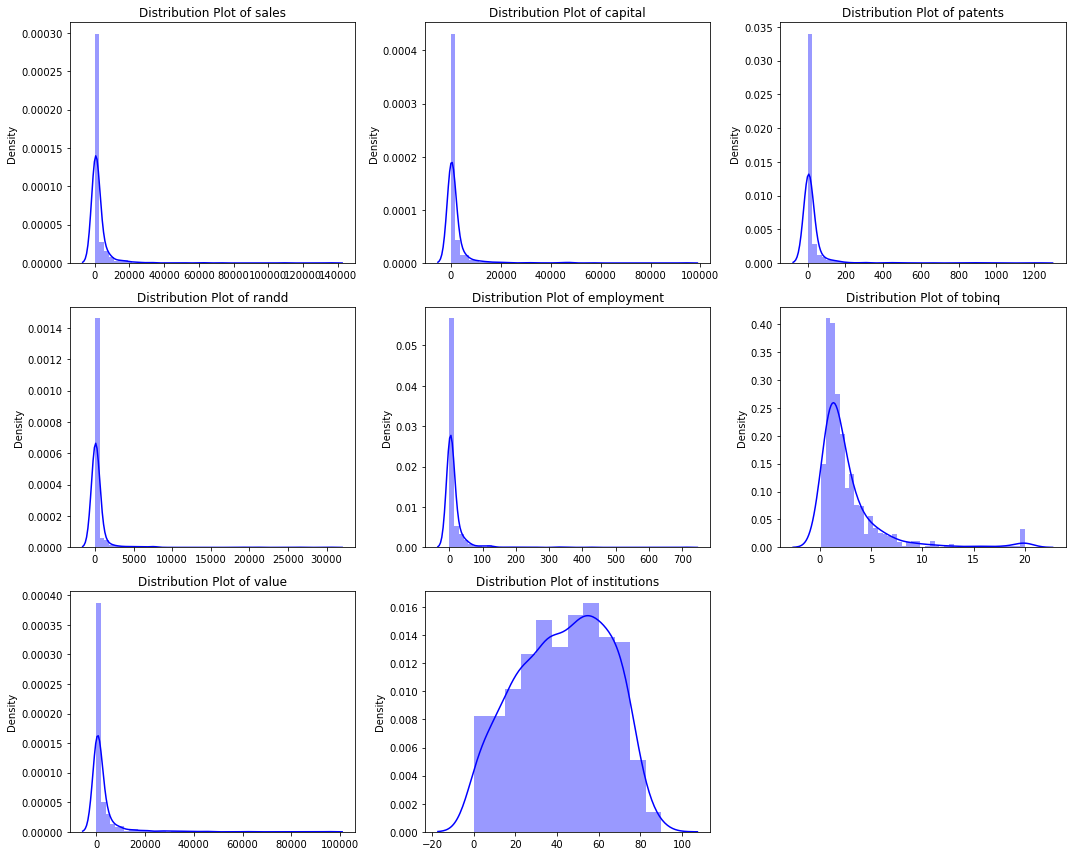

In [14]:
plt.figure(figsize = (15,12))
feature_list = firm_num
for i in range(len(feature_list)):
    plt.subplot(3,3,i+1)
    sns.distplot(x=firm[feature_list[i]], color='b',fit = None)
    plt.title('Distribution Plot of {}'.format(feature_list[i]))
    plt.tight_layout()

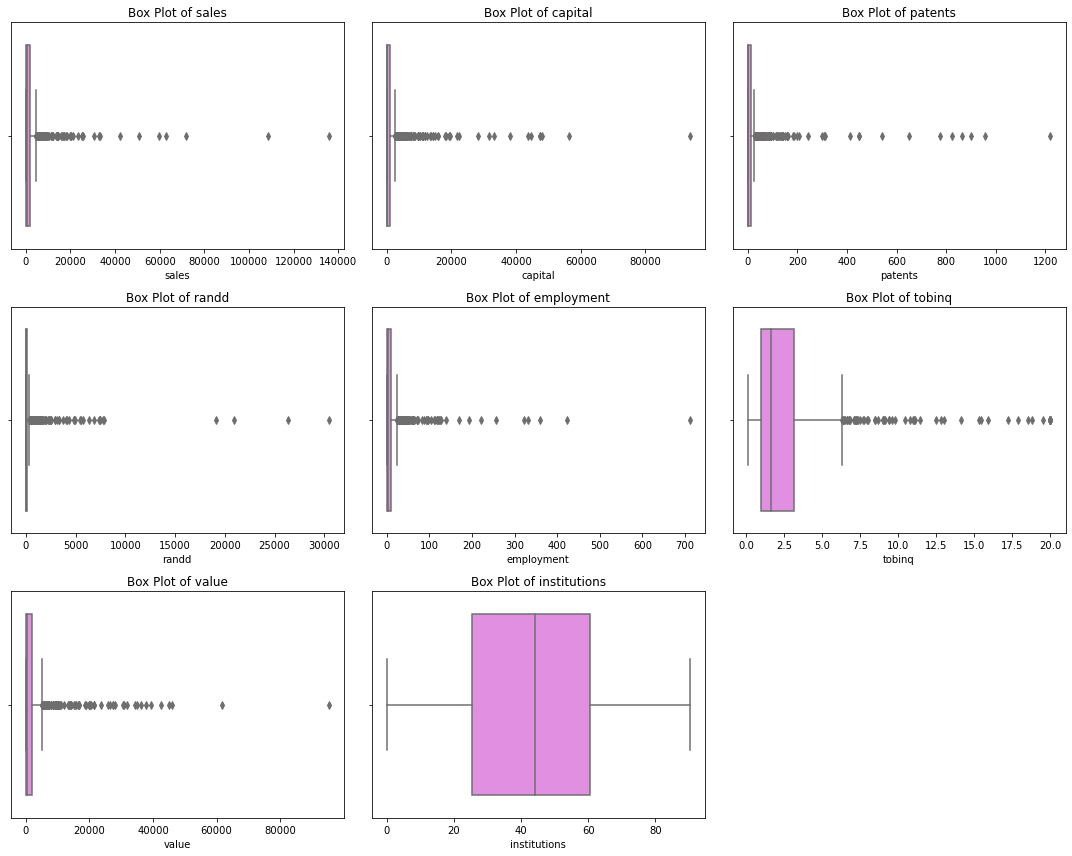

In [15]:
plt.figure(figsize = (15,12))
feature_list = firm_num
for i in range(len(feature_list)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=firm[feature_list[i]], color='violet',orient='h')
    plt.title('Box Plot of {}'.format(feature_list[i]))
    plt.tight_layout()

### Bivariate analysis

In [16]:
firm['sp500'].value_counts()

no     542
yes    217
Name: sp500, dtype: int64

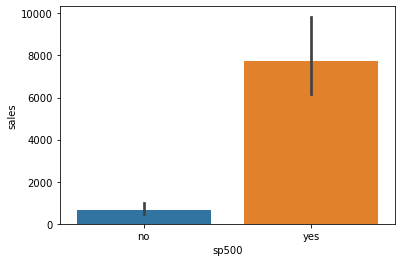

In [17]:
sns.barplot(x=firm['sp500'],y=firm['sales']);

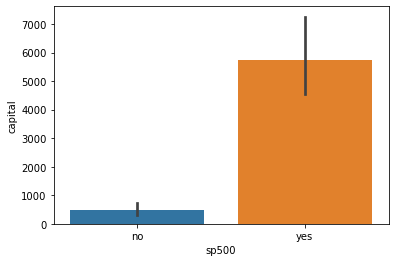

In [18]:
sns.barplot(x=firm['sp500'],y=firm['capital']);

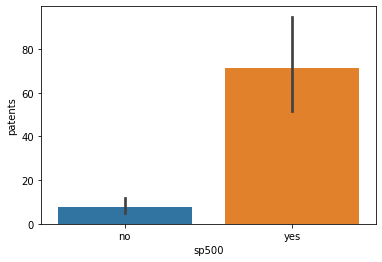

In [19]:
sns.barplot(x=firm['sp500'],y=firm['patents']);

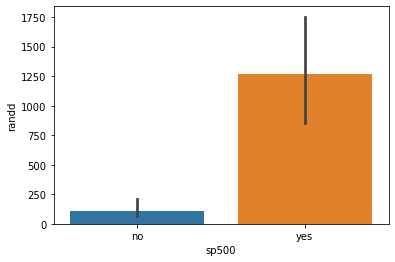

In [20]:
sns.barplot(x=firm['sp500'],y=firm['randd']);

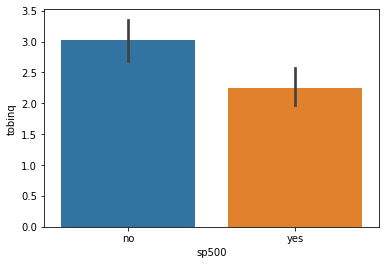

In [21]:
sns.barplot(x=firm['sp500'],y=firm['tobinq']);

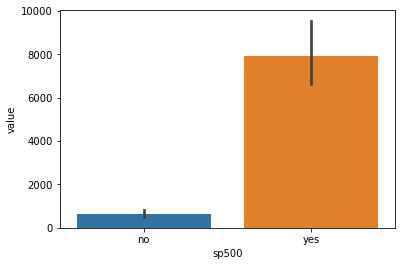

In [22]:
sns.barplot(x=firm['sp500'],y=firm['value']);

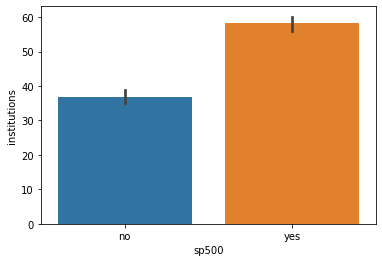

In [23]:
sns.barplot(x=firm['sp500'],y=firm['institutions']);

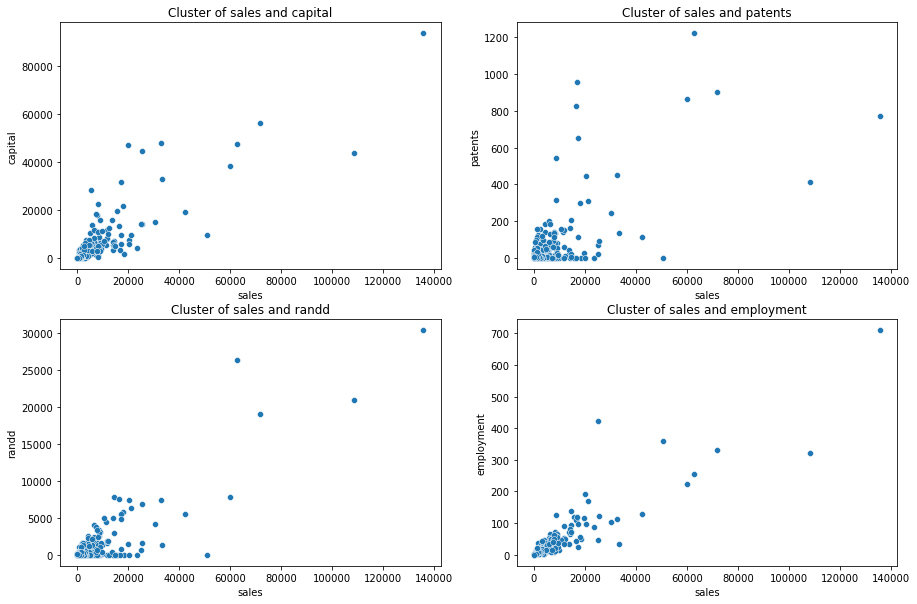

In [24]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.scatterplot(x='sales', y='capital', data=firm)
plt.title('Cluster of sales and capital')

plt.subplot(2,2,2)
sns.scatterplot(x='sales', y='patents', data=firm)
plt.title('Cluster of sales and patents')

plt.subplot(2,2,3)
sns.scatterplot(x='sales', y='randd', data=firm)
plt.title('Cluster of sales and randd')

plt.subplot(2,2,4)
sns.scatterplot(x='sales', y='employment', data=firm)
plt.title('Cluster of sales and employment');


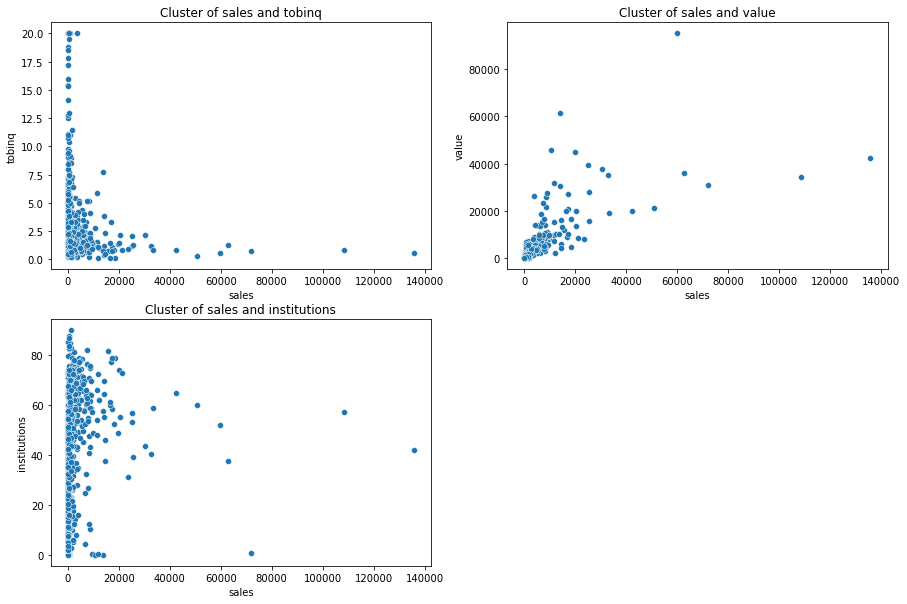

In [25]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.scatterplot(x='sales', y='tobinq', data=firm)
plt.title('Cluster of sales and tobinq')

plt.subplot(2,2,2)
sns.scatterplot(x='sales', y='value', data=firm)
plt.title('Cluster of sales and value')

plt.subplot(2,2,3)
sns.scatterplot(x='sales', y='institutions', data=firm)
plt.title('Cluster of sales and institutions');


### Pair plot

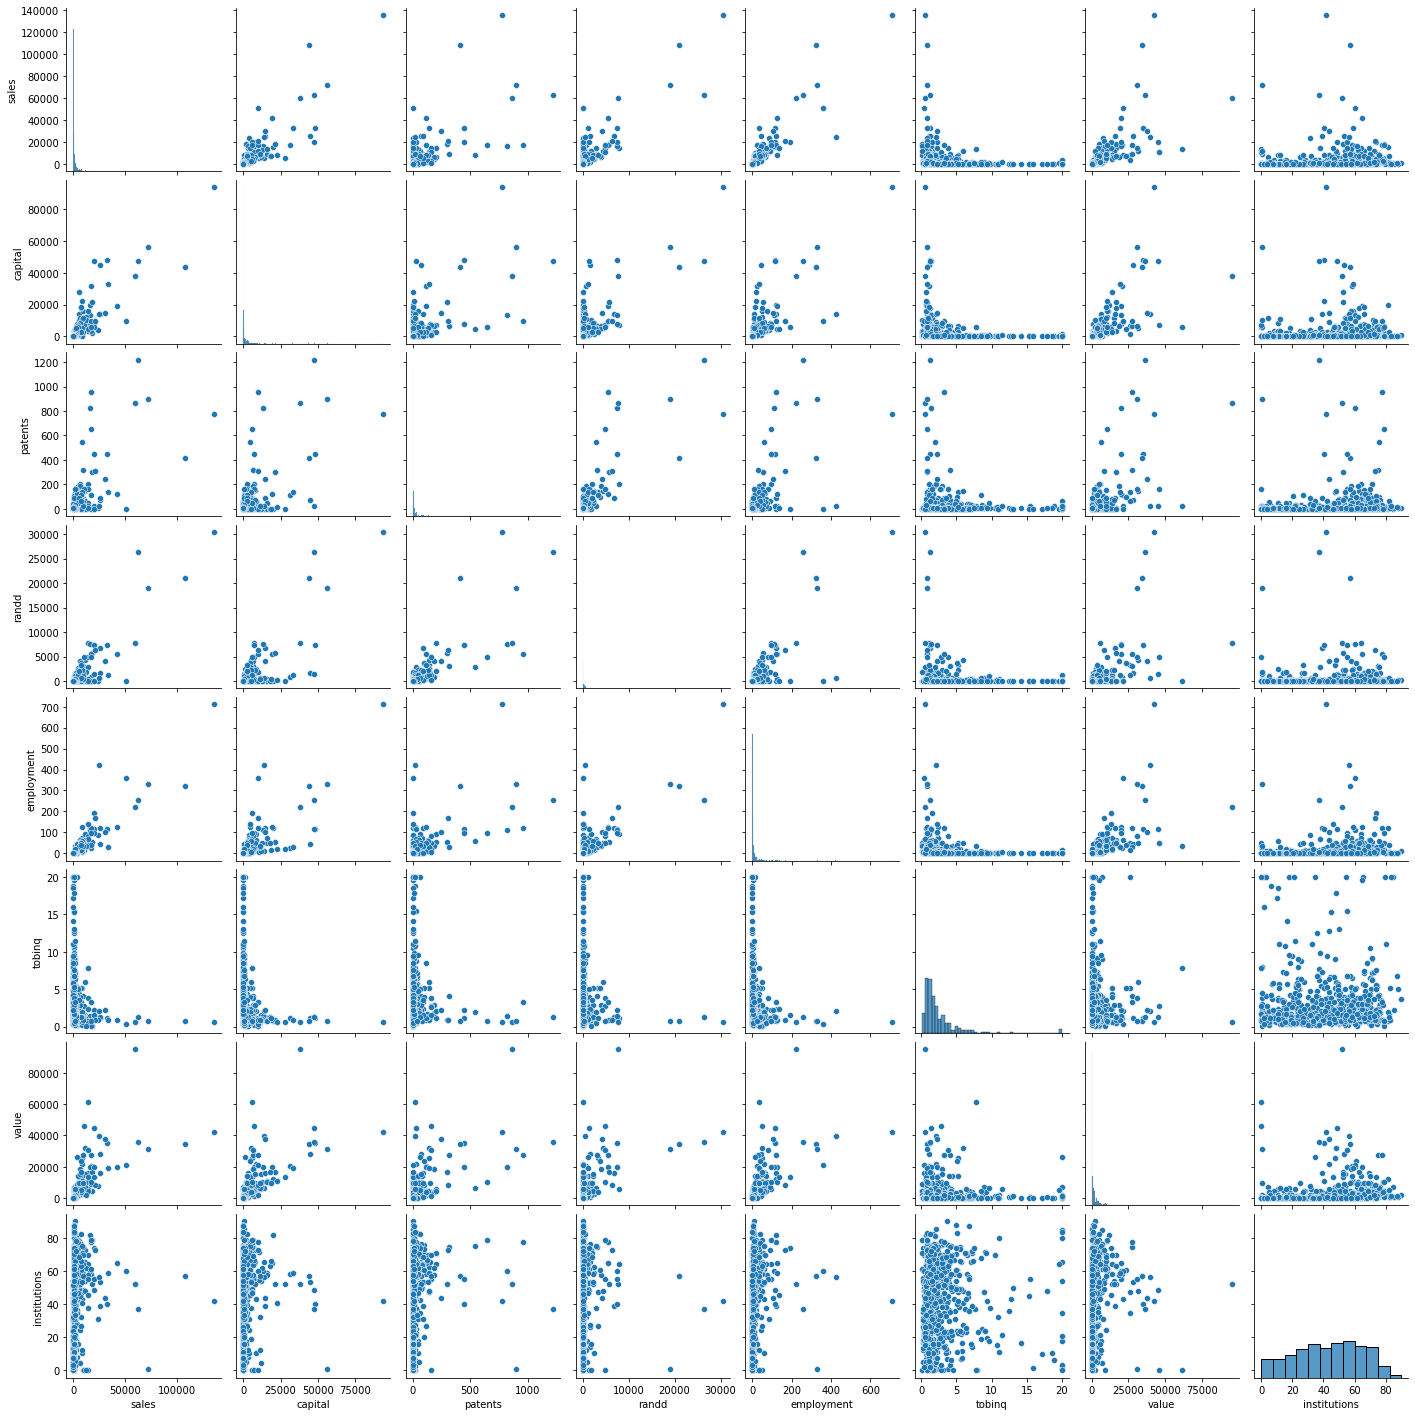

In [26]:
sns.pairplot(firm);

<AxesSubplot:>

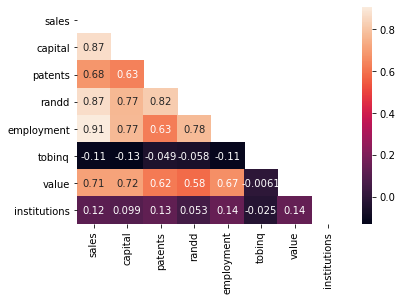

In [27]:
g = firm.corr()
sns.heatmap(g,annot=True,mask=np.triu(g))

## 1.2) Impute null values if present? Do you think scaling is necessary in this case? (8 marks)

In [28]:
# Treating Null values 

for column in firm.columns:
    if firm[column].dtype != 'object':
        mean = firm[column].mean()
        firm[column] = firm[column].fillna(mean)    
        
firm.isnull().sum()        

sales           0
capital         0
patents         0
randd           0
employment      0
sp500           0
tobinq          0
value           0
institutions    0
dtype: int64

In [29]:
firm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759 entries, 0 to 758
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sales         759 non-null    float64
 1   capital       759 non-null    float64
 2   patents       759 non-null    int64  
 3   randd         759 non-null    float64
 4   employment    759 non-null    float64
 5   sp500         759 non-null    object 
 6   tobinq        759 non-null    float64
 7   value         759 non-null    float64
 8   institutions  759 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 75.5+ KB


In [30]:
# One Hot Encoding

firm1 = pd.get_dummies(firm, columns=['sp500'],drop_first=True)

In [31]:
firm1.head()

,sales,capital,patents,randd,employment,tobinq,value,institutions,sp500_yes
0,826.995050,161.603986,10,382.078247,2.306000,11.049511,1625.453755,80.27,0
1,407.753973,122.101012,2,0.000000,1.860000,0.844187,243.117082,59.02,0
2,8407.845588,6221.144614,138,3296.700439,49.659005,5.205257,25865.233800,47.70,1
3,451.000010,266.899987,1,83.540161,3.071000,0.305221,63.024630,26.88,0
4,174.927981,140.124004,2,14.233637,1.947000,1.063300,67.406408,49.46,0


In [32]:
firm1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759 entries, 0 to 758
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sales         759 non-null    float64
 1   capital       759 non-null    float64
 2   patents       759 non-null    int64  
 3   randd         759 non-null    float64
 4   employment    759 non-null    float64
 5   tobinq        759 non-null    float64
 6   value         759 non-null    float64
 7   institutions  759 non-null    float64
 8   sp500_yes     759 non-null    uint8  
dtypes: float64(7), int64(1), uint8(1)
memory usage: 70.3 KB


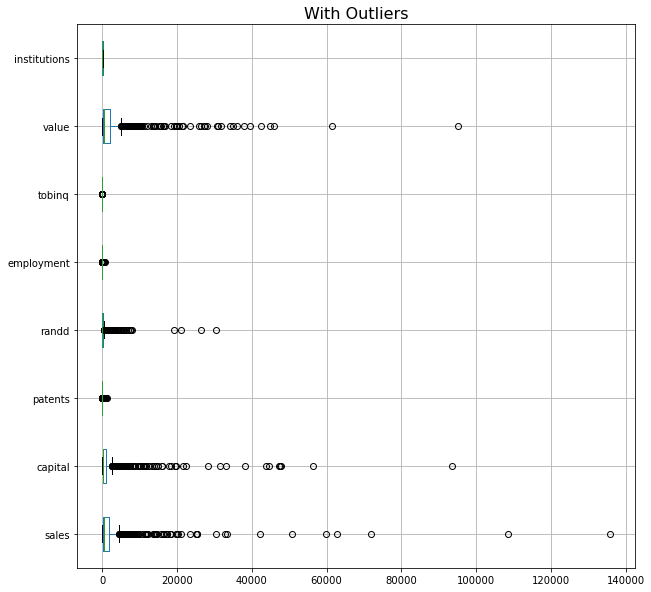

In [33]:
# construct box plot for continuous variables
cont=firm1.dtypes[(firm1.dtypes!='uint8') & (firm1.dtypes!='bool')].index
plt.figure(figsize=(10,10))
firm1[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [34]:
# Remove outlier
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [35]:
for column in firm1[cont].columns:
    lr,ur=remove_outlier(firm1[column])
    firm1[column]=np.where(firm1[column]>ur,ur,firm1[column])
    firm1[column]=np.where(firm1[column]<lr,lr,firm1[column])

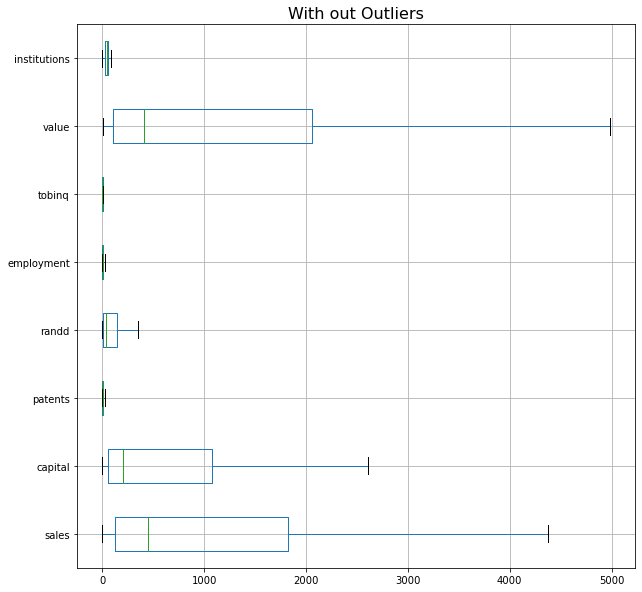

In [36]:
# construct box plot for continuous variables
cont=firm1.dtypes[(firm1.dtypes!='uint8') & (firm1.dtypes!='bool')].index
plt.figure(figsize=(10,10))
firm1[cont].boxplot(vert=0)
plt.title('With out Outliers',fontsize=16)
plt.show()

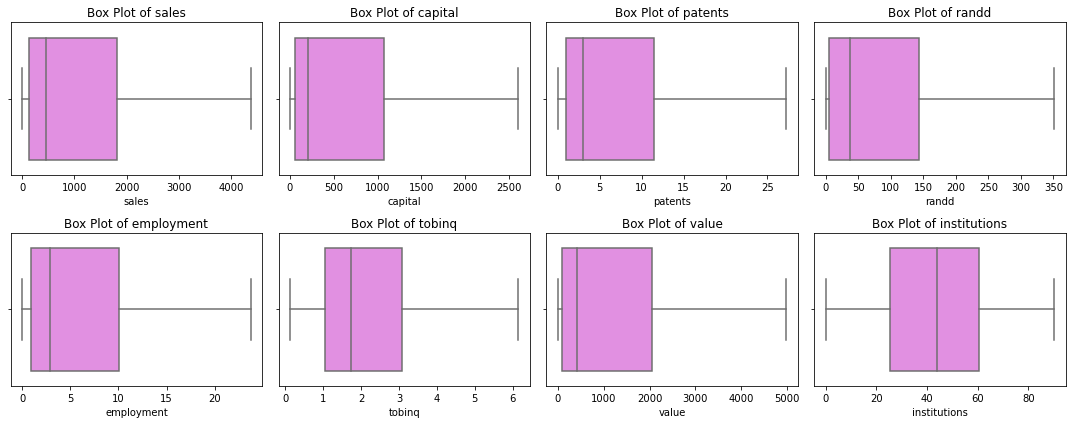

In [37]:
plt.figure(figsize = (15,6))
feature_list = firm1[cont].columns
for i in range(len(feature_list)):
    plt.subplot(2,4,i+1)
    sns.boxplot(x=firm1[feature_list[i]], color='violet',orient='h')
    plt.title('Box Plot of {}'.format(feature_list[i]))
    plt.tight_layout()

## 1.3) Encode the data (having string values) for Modelling. Data Split: Split the data into test and train (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using R-square, RMSE.

In [38]:
y = firm1[['sales']]
X = firm1.drop('sales',axis=1)

In [39]:
print('X -',X.shape)
print('Y -',y.shape)

X - (759, 8)
Y - (759, 1)


In [40]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

# Model1

In [41]:
# invoke the LinearRegression function and find the bestfit model on training data
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

LinearRegression()

In [42]:
model_LR.coef_

array([[  0.40615441,  -4.64732685,   0.6398846 ,  78.61372479,
        -39.92578934,   0.24462525,   0.21743856, 166.13208674]])

In [43]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, model_LR.coef_[0][idx]))

The coefficient for capital is 0.40615440840415556
The coefficient for patents is -4.647326848672777
The coefficient for randd is 0.6398846045072545
The coefficient for employment is 78.61372479076563
The coefficient for tobinq is -39.92578934013666
The coefficient for value is 0.2446252451452869
The coefficient for institutions is 0.21743855519970906
The coefficient for sp500_yes is 166.13208673705614


In [44]:
# Let us check the intercept for the model

intercept = model_LR.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 72.8311267554659


In [45]:
# R square on training data
model_LR.score(X_train, y_train)

0.9358806629736066

In [46]:
# R square on testing data
model_LR.score(X_test, y_test)

0.9241294393352391

In [47]:
#RMSE on Training data
predicted_train=model_LR.predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

394.6129494572075

In [48]:
#RMSE on Testing data
predicted_test=model_LR.predict(X_test)
predicted_test
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

399.7432133211279

In [49]:
predicted_test

array([[ 1.84990818e+02],
       [ 3.85340359e+02],
       [ 2.60006727e+03],
       [ 1.45302691e+02],
       [ 5.60454588e+02],
       [ 7.32242698e+01],
       [ 1.18646321e+02],
       [-1.38824861e+02],
       [ 2.38574003e+03],
       [ 1.05158231e+02],
       [ 1.53716626e+02],
       [ 2.31459036e+02],
       [ 4.20314358e+01],
       [ 1.10120883e+03],
       [ 6.46007931e+01],
       [ 8.23254733e+02],
       [ 1.87700880e+02],
       [ 6.28992912e+02],
       [ 1.27905608e+01],
       [ 2.80123974e+03],
       [ 5.46656057e+02],
       [ 1.26949982e+01],
       [ 4.47149548e+03],
       [ 1.32315386e+03],
       [ 4.43253537e+03],
       [ 1.28246279e+03],
       [ 1.87650853e+03],
       [ 1.72960731e+02],
       [ 4.46148905e+03],
       [ 3.49039348e+03],
       [ 4.44390629e+03],
       [ 3.74817842e+03],
       [-6.35883396e+01],
       [ 8.63844230e+02],
       [ 4.47769740e+03],
       [ 5.00694291e+02],
       [ 2.27458606e+02],
       [ 2.06921565e+02],
       [ 4.5

In [50]:
#Training
from sklearn import metrics
metrics.r2_score(y_train, predicted_train)

0.9358806629736066

In [51]:
metrics.r2_score(y_test, predicted_test)

0.9241294393352391

In [52]:
print('The co-efficients:', model_LR.coef_)
print('The intercept:', model_LR.intercept_)
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, predicted_test),2))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, predicted_test)))
print('Co-efficient of Determination (r-square) on the train data:', metrics.r2_score(y_train, predicted_train))
print('Co-efficient of Determination (r-square) on the test data:', metrics.r2_score(y_test, predicted_test))

The co-efficients: [[  0.40615441  -4.64732685   0.6398846   78.61372479 -39.92578934
    0.24462525   0.21743856 166.13208674]]
The intercept: [72.83112676]
Mean Squared Error (MSE): 159794.64
Root Mean Squared Error (RMSE): 399.7432133211279
Co-efficient of Determination (r-square) on the train data: 0.9358806629736066
Co-efficient of Determination (r-square) on the test data: 0.9241294393352391


### stats model

## Model2

In [53]:
# concatenate X and y into a single dataframe
data_train1 = pd.concat([X_train, y_train], axis=1)
data_test1 = pd.concat([X_test,y_test],axis=1)
data_train1.head()

,capital,patents,randd,employment,tobinq,value,institutions,sp500_yes,sales
626,1315.696256,15.0,73.275818,16.472000,1.657513,2231.870118,31.47,0,1947.224100
333,15.258002,2.0,9.252643,0.566000,0.381755,9.877838,21.69,0,60.327997
257,538.188036,20.0,87.388641,6.627000,2.126738,1019.443780,69.64,0,1065.748032
173,807.215091,0.0,68.900185,7.607001,3.151469,2221.768944,69.69,1,1193.647768
242,402.508010,2.0,0.000000,1.550000,2.154388,358.040202,85.42,0,164.135025


In [54]:
exp = 'sales ~ capital+patents+randd+employment+tobinq+value+institutions'

In [55]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= exp, data = data_train1).fit()
lm1.params

Intercept       54.546195
capital          0.407526
patents         -4.135769
randd            0.656382
employment      81.321004
tobinq         -40.757798
value            0.262404
institutions     0.623987
dtype: float64

In [56]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     1077.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):          6.82e-306
Time:                        22:39:53   Log-Likelihood:                -3930.9
No. Observations:                 531   AIC:                             7878.
Df Residuals:                     523   BIC:                             7912.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       54.5462     48.732      1.119   

In [57]:
# Calculate MSE
mse1 = np.mean((lm1.predict(data_train1.drop('sales',axis=1))-data_train1['sales'])**2)

In [58]:
#Root Mean Squared Error - RMSE
np.sqrt(mse1)

396.96467564664727

In [59]:
np.sqrt(lm1.mse_resid) #another way

399.98921214103024

In [60]:
# Prediction on Test data
y_pred = lm1.predict(data_test1)

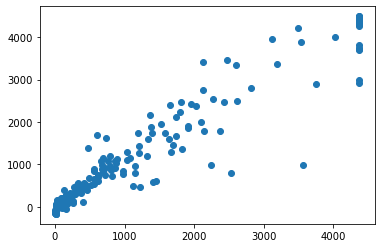

In [61]:
plt.scatter(y_test['sales'], y_pred)
plt.show()

In [62]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(54.55) * Intercept + (0.41) * capital + (-4.14) * patents + (0.66) * randd + (81.32) * employment + (-40.76) * tobinq + (0.26) * value + (0.62) * institutions + 

## Model 3

In [63]:
# concatenate X and y into a single dataframe
data_train2 = pd.concat([X_train, y_train], axis=1)
data_test2 = pd.concat([X_test,y_test],axis=1)
data_train2.head() 

,capital,patents,randd,employment,tobinq,value,institutions,sp500_yes,sales
626,1315.696256,15.0,73.275818,16.472000,1.657513,2231.870118,31.47,0,1947.224100
333,15.258002,2.0,9.252643,0.566000,0.381755,9.877838,21.69,0,60.327997
257,538.188036,20.0,87.388641,6.627000,2.126738,1019.443780,69.64,0,1065.748032
173,807.215091,0.0,68.900185,7.607001,3.151469,2221.768944,69.69,1,1193.647768
242,402.508010,2.0,0.000000,1.550000,2.154388,358.040202,85.42,0,164.135025


In [64]:
data_train2.columns

Index(['capital', 'patents', 'randd', 'employment', 'tobinq', 'value',
       'institutions', 'sp500_yes', 'sales'],
      dtype='object')

In [65]:
exp1 = 'sales ~ capital+patents+randd+employment+tobinq+value+institutions+sp500_yes'

In [66]:
import statsmodels.formula.api as smf1
lm2 = smf1.ols(formula= exp1, data = data_train2).fit()
lm2.params

Intercept        72.831127
capital           0.406154
patents          -4.647327
randd             0.639885
employment       78.613725
tobinq          -39.925789
value             0.244625
institutions      0.217439
sp500_yes       166.132087
dtype: float64

In [67]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     952.4
Date:                Sat, 25 Jun 2022   Prob (F-statistic):          1.05e-305
Time:                        22:39:54   Log-Likelihood:                -3927.7
No. Observations:                 531   AIC:                             7873.
Df Residuals:                     522   BIC:                             7912.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       72.8311     49.039      1.485   

In [68]:
# Calculate MSE
mse2 = np.mean((lm2.predict(data_train2.drop('sales',axis=1))-data_train2['sales'])**2)

In [69]:
#Root Mean Squared Error - RMSE
np.sqrt(mse2)

394.6129494572074

In [70]:
np.sqrt(lm2.mse_resid) #another way

398.00024720317396

In [71]:
# Prediction on Test data
y_pred = lm2.predict(data_test2)

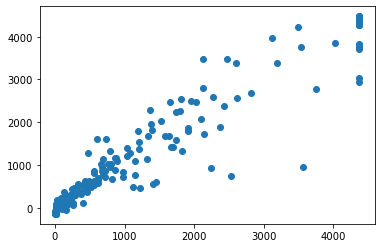

In [72]:
plt.scatter(y_test['sales'], y_pred)
plt.show()

In [73]:
for i,j in np.array(lm2.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(72.83) * Intercept + (0.41) * capital + (-4.65) * patents + (0.64) * randd + (78.61) * employment + (-39.93) * tobinq + (0.24) * value + (0.22) * institutions + (166.13) * sp500_yes + 

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [75]:
i=0
for column in X.columns:
    if i < 25:
        print (column ,"--->",  vif[i])
        i = i+1

capital ---> 8.594129880100176
patents ---> 4.115963077714671
randd ---> 4.715060025092686
employment ---> 8.834219233844008
tobinq ---> 2.753243492679158
value ---> 9.114377911549704
institutions ---> 3.96259424309343
sp500_yes ---> 3.7643010848794525


## 1.4) Inference: Based on these predictions, what are the business insights and recommendations.

**<------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------->**

# Problem 2: Logistic Regression and Linear Discriminant Analysis

You are hired by the Government to do an analysis of car crashes. You are provided details of car crashes, among which some people survived and some didn't. You have to help the government in predicting whether a person will survive or not on the basis of the information given in the data set so as to provide insights that will help the government to make stronger laws for car manufacturers to ensure safety measures. Also, find out the important factors on the basis of which you made your predictions.

1. dvcat: factor with levels (estimated impact speeds) 1-9km/h, 10-24, 25-39, 40-54, 55+
2. weight: Observation weights, albeit of uncertain accuracy, designed to account for varying sampling probabilities. (The inverse probability weighting estimator can be used to demonstrate causality when the researcher cannot conduct a controlled experiment but has observed data to model)
3. Survived: factor with levels Survived or not_survived
4. airbag: a factor with levels none or airbag
5. seatbelt: a factor with levels none or belted
6. frontal: a numeric vector; 0 = non-frontal, 1=frontal impact
7. sex: a factor with levels f: Female or m: Male
8. ageOFocc: age of occupant in years
9. yearacc: year of accident
10. yearVeh: Year of model of vehicle; a numeric vector
11. abcat: Did one or more (driver or passenger) airbag(s) deploy? This factor has levels deploy, nodeploy and unavail
12. occRole: a factor with levels driver or pass: passenger
13. deploy: a numeric vector: 0 if an airbag was unavailable or did not deploy; 1 if one or more bags deployed.
14. injSeverity: a numeric vector; 0: none, 1: possible injury, 2: no incapacity, 3: incapacity, 4: killed; 5: unknown, 6: prior death
15. caseid: character, created by pasting together the population's sampling unit, the case number, and the vehicle number. Within each year, use this to uniquely identify the vehicle.

## 2.1) Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis. 

In [76]:
# Read the data

car = pd.read_csv('Car_Crash.csv')

In [77]:
car.head()

,Unnamed: 0,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987.0,unavail,driver,0,4.0,2:13:2
1,1,25-39,89.627,Not_Survived,airbag,belted,0,f,54,1997,1994.0,nodeploy,driver,0,4.0,2:17:1
2,2,55+,27.078,Not_Survived,none,belted,1,m,67,1997,1992.0,unavail,driver,0,4.0,2:79:1
3,3,55+,27.078,Not_Survived,none,belted,1,f,64,1997,1992.0,unavail,pass,0,4.0,2:79:1
4,4,55+,13.374,Not_Survived,none,none,1,m,23,1997,1986.0,unavail,driver,0,4.0,4:58:1


In [78]:
# Summary of data
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   11217 non-null  int64  
 1   dvcat        11217 non-null  object 
 2   weight       11217 non-null  float64
 3   Survived     11217 non-null  object 
 4   airbag       11217 non-null  object 
 5   seatbelt     11217 non-null  object 
 6   frontal      11217 non-null  int64  
 7   sex          11217 non-null  object 
 8   ageOFocc     11217 non-null  int64  
 9   yearacc      11217 non-null  int64  
 10  yearVeh      11217 non-null  float64
 11  abcat        11217 non-null  object 
 12  occRole      11217 non-null  object 
 13  deploy       11217 non-null  int64  
 14  injSeverity  11140 non-null  float64
 15  caseid       11217 non-null  object 
dtypes: float64(3), int64(5), object(8)
memory usage: 1.4+ MB


In [79]:
# check data types
car.dtypes

Unnamed: 0       int64
dvcat           object
weight         float64
Survived        object
airbag          object
seatbelt        object
frontal          int64
sex             object
ageOFocc         int64
yearacc          int64
yearVeh        float64
abcat           object
occRole         object
deploy           int64
injSeverity    float64
caseid          object
dtype: object

In [80]:
# Describe data
car.describe(include='all')

,Unnamed: 0,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
count,11217.000000,11217,11217.000000,11217,11217,11217,11217.000000,11217,11217.000000,11217.000000,11217.000000,11217,11217,11217.000000,11140.000000,11217
unique,NaN,5,NaN,2,2,2,NaN,2,NaN,NaN,NaN,3,2,NaN,NaN,6488
top,NaN,10-24,NaN,survived,airbag,belted,NaN,m,NaN,NaN,NaN,deploy,driver,NaN,NaN,73:100:2
freq,NaN,5414,NaN,10037,7064,7849,NaN,6048,NaN,NaN,NaN,4365,8786,NaN,NaN,7
mean,5608.000000,NaN,431.405309,NaN,NaN,NaN,0.644022,NaN,37.427654,2001.103236,1994.177944,NaN,NaN,0.389141,1.825583,NaN
std,3238.213319,NaN,1406.202941,NaN,NaN,NaN,0.478830,NaN,18.192429,1.056805,5.658704,NaN,NaN,0.487577,1.378535,NaN
min,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,16.000000,1997.000000,1953.000000,NaN,NaN,0.000000,0.000000,NaN
25%,2804.000000,NaN,28.292000,NaN,NaN,NaN,0.000000,NaN,22.000000,2001.000000,1991.000000,NaN,NaN,0.000000,1.000000,NaN
50%,5608.000000,NaN,82.195000,NaN,NaN,NaN,1.000000,NaN,33.000000,2001.000000,1995.000000,NaN,NaN,0.000000,2.000000,NaN
75%,8412.000000,NaN,324.056000,NaN,NaN,NaN,1.000000,NaN,48.000000,2002.000000,1999.000000,NaN,NaN,1.000000,3.000000,NaN


In [81]:
# shape of data - To check number of rows and columns 

car.shape

(11217, 16)

In [82]:
# To check duplicates - we can observe that there are no duplicates

car.duplicated().sum()

0

In [83]:
# To find missing values
# we can observe that there is no missing values

car.isnull().sum()

Unnamed: 0      0
dvcat           0
weight          0
Survived        0
airbag          0
seatbelt        0
frontal         0
sex             0
ageOFocc        0
yearacc         0
yearVeh         0
abcat           0
occRole         0
deploy          0
injSeverity    77
caseid          0
dtype: int64

In [84]:
car = car.drop(['Unnamed: 0','caseid'],axis=1)

In [85]:
car['injSeverity'] = car['injSeverity'].fillna(0)

In [86]:
car.isnull().sum()

dvcat          0
weight         0
Survived       0
airbag         0
seatbelt       0
frontal        0
sex            0
ageOFocc       0
yearacc        0
yearVeh        0
abcat          0
occRole        0
deploy         0
injSeverity    0
dtype: int64

### Univariate Analysis

In [87]:
car.head()

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity
0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987.0,unavail,driver,0,4.0
1,25-39,89.627,Not_Survived,airbag,belted,0,f,54,1997,1994.0,nodeploy,driver,0,4.0
2,55+,27.078,Not_Survived,none,belted,1,m,67,1997,1992.0,unavail,driver,0,4.0
3,55+,27.078,Not_Survived,none,belted,1,f,64,1997,1992.0,unavail,pass,0,4.0
4,55+,13.374,Not_Survived,none,none,1,m,23,1997,1986.0,unavail,driver,0,4.0


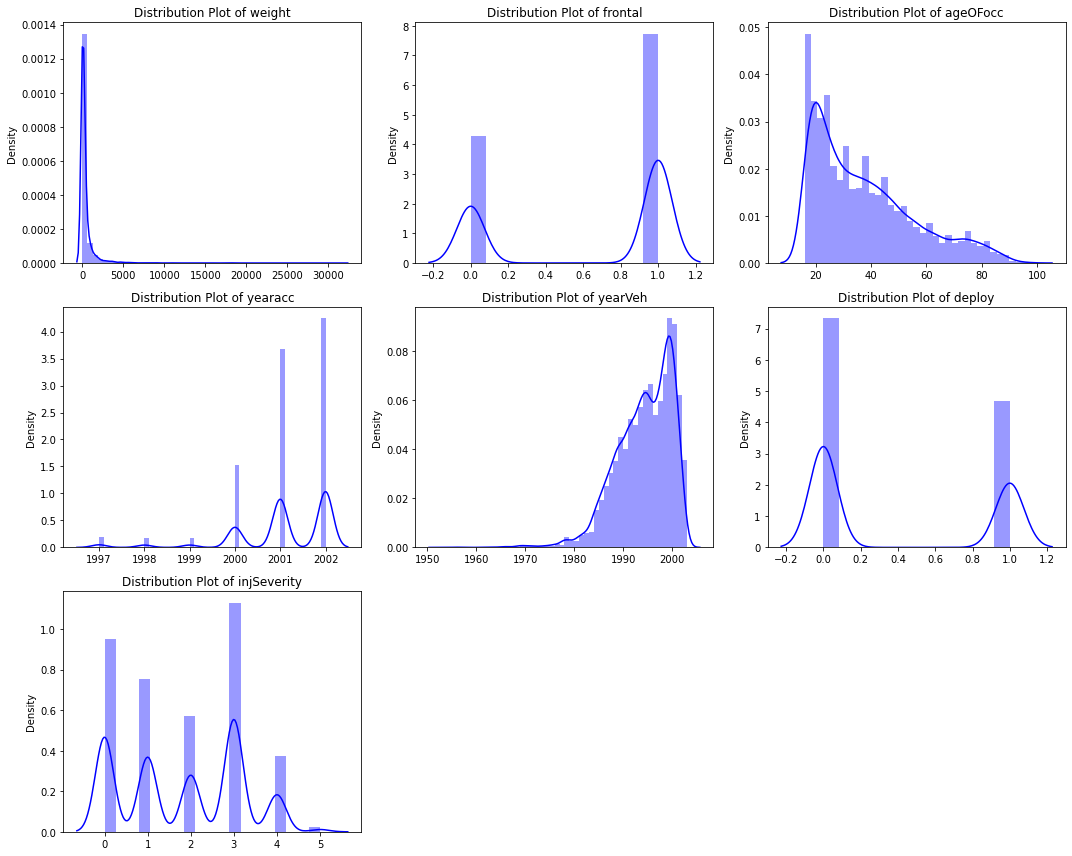

In [88]:
plt.figure(figsize = (15,12))
feature_list = car.describe().columns
for i in range(len(feature_list)):
    plt.subplot(3,3,i+1)
    sns.distplot(x=car[feature_list[i]], color='b',fit = None)
    plt.title('Distribution Plot of {}'.format(feature_list[i]))
    plt.tight_layout()

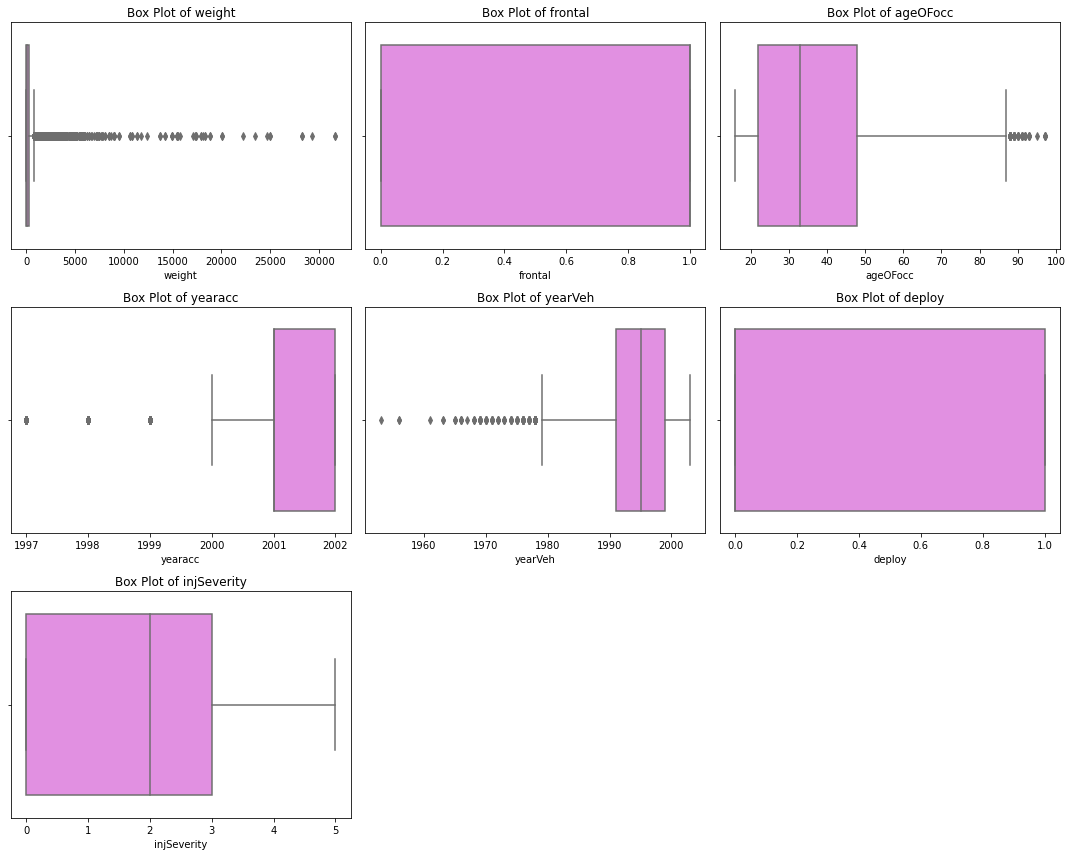

In [89]:
plt.figure(figsize = (15,12))
feature_list = car.describe().columns
for i in range(len(feature_list)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=car[feature_list[i]], color='violet',orient='h')
    plt.title('Box Plot of {}'.format(feature_list[i]))
    plt.tight_layout()

## Bivariate Analysis

In [90]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        11217 non-null  object 
 1   weight       11217 non-null  float64
 2   Survived     11217 non-null  object 
 3   airbag       11217 non-null  object 
 4   seatbelt     11217 non-null  object 
 5   frontal      11217 non-null  int64  
 6   sex          11217 non-null  object 
 7   ageOFocc     11217 non-null  int64  
 8   yearacc      11217 non-null  int64  
 9   yearVeh      11217 non-null  float64
 10  abcat        11217 non-null  object 
 11  occRole      11217 non-null  object 
 12  deploy       11217 non-null  int64  
 13  injSeverity  11217 non-null  float64
dtypes: float64(3), int64(4), object(7)
memory usage: 1.2+ MB


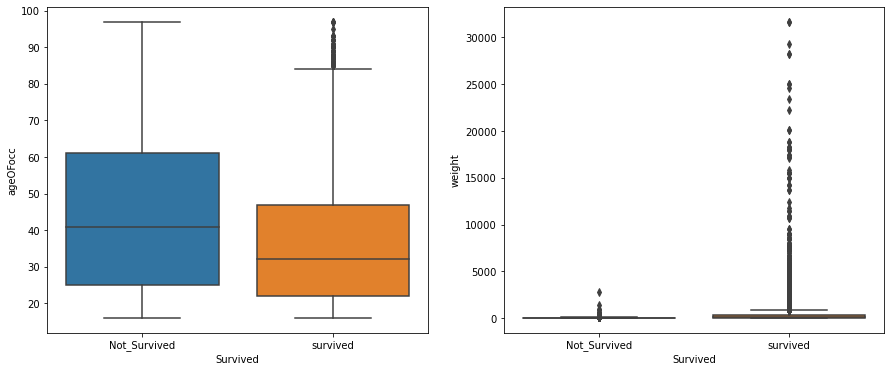

In [91]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(x=car['Survived'],y=car['ageOFocc'])
plt.subplot(1,2,2)
sns.boxplot(x=car['Survived'],y=car['weight'])

plt.show();

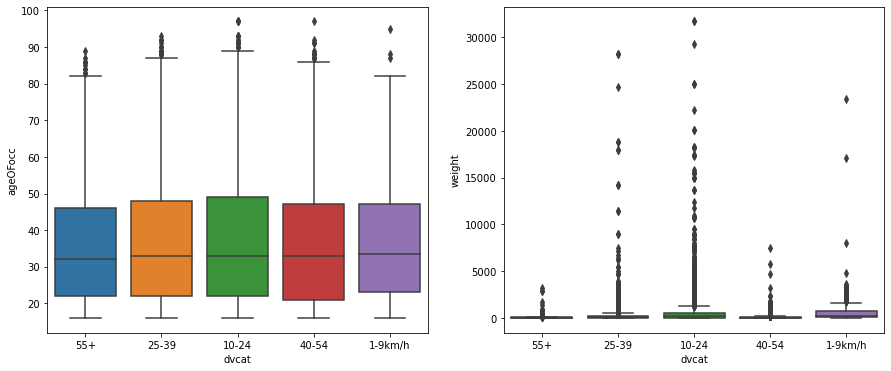

In [92]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(x=car['dvcat'],y=car['ageOFocc'])
plt.subplot(1,2,2)
sns.boxplot(x=car['dvcat'],y=car['weight'])

plt.show();

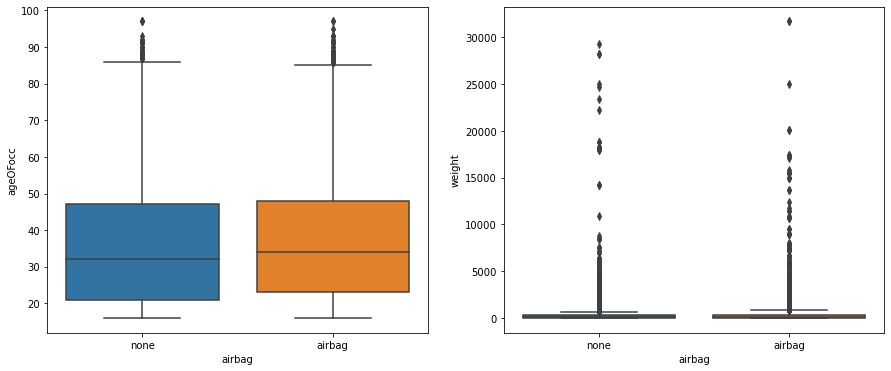

In [93]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(x=car['airbag'],y=car['ageOFocc'])
plt.subplot(1,2,2)
sns.boxplot(x=car['airbag'],y=car['weight'])

plt.show();

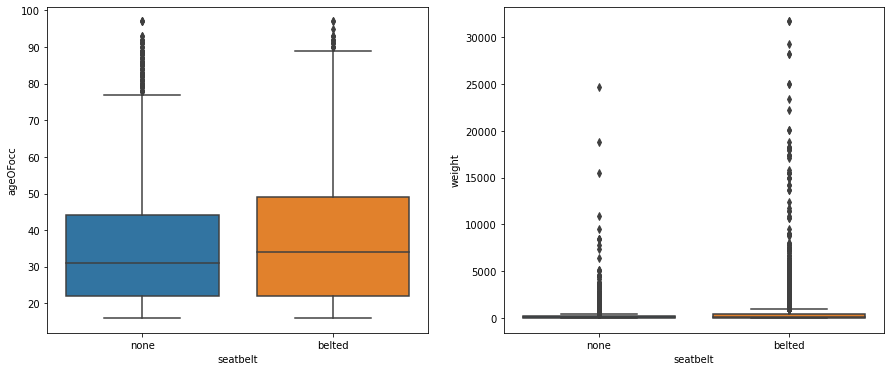

In [94]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(x=car['seatbelt'],y=car['ageOFocc'])
plt.subplot(1,2,2)
sns.boxplot(x=car['seatbelt'],y=car['weight'])

plt.show();

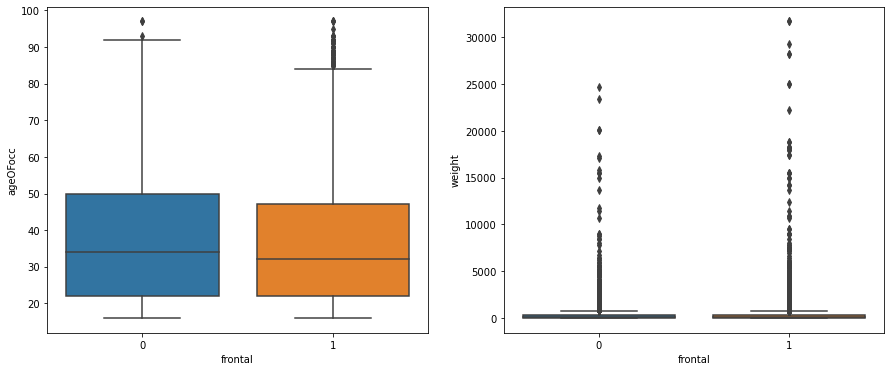

In [95]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(x=car['frontal'],y=car['ageOFocc'])
plt.subplot(1,2,2)
sns.boxplot(x=car['frontal'],y=car['weight'])

plt.show();

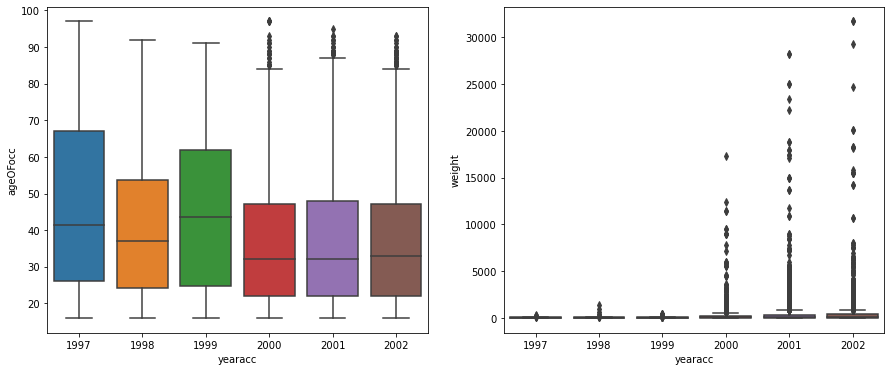

In [96]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(x=car['yearacc'],y=car['ageOFocc'])
plt.subplot(1,2,2)
sns.boxplot(x=car['yearacc'],y=car['weight'])

plt.show();

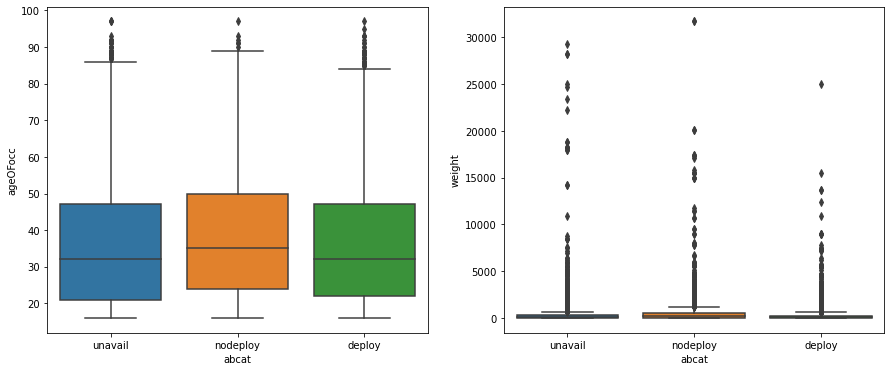

In [97]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(x=car['abcat'],y=car['ageOFocc'])
plt.subplot(1,2,2)
sns.boxplot(x=car['abcat'],y=car['weight'])

plt.show();

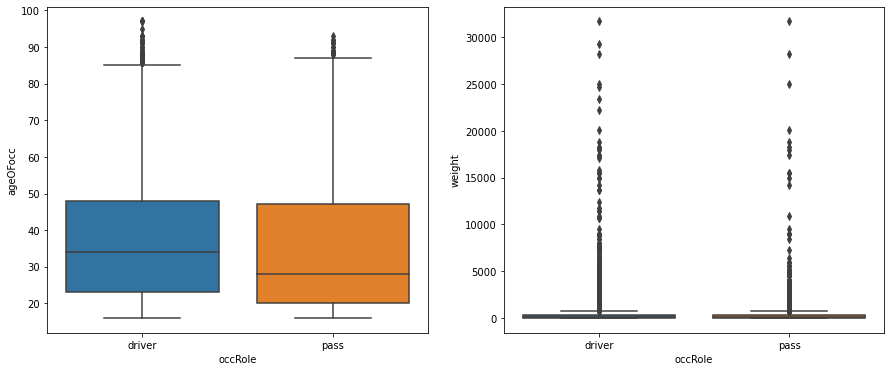

In [98]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(x=car['occRole'],y=car['ageOFocc'])
plt.subplot(1,2,2)
sns.boxplot(x=car['occRole'],y=car['weight'])

plt.show();

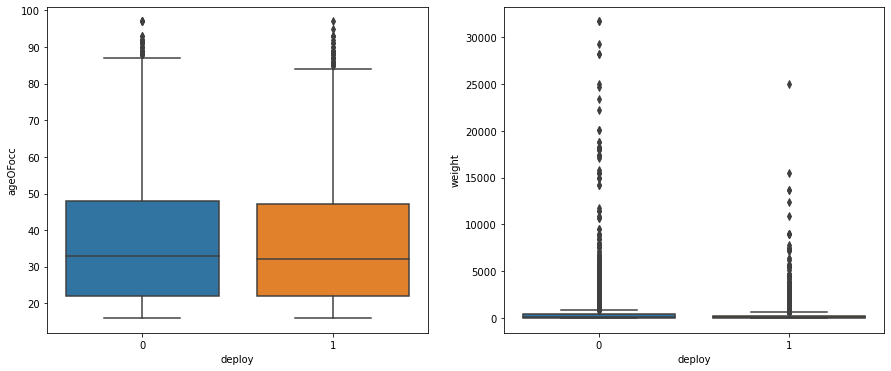

In [99]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(x=car['deploy'],y=car['ageOFocc'])
plt.subplot(1,2,2)
sns.boxplot(x=car['deploy'],y=car['weight'])

plt.show();

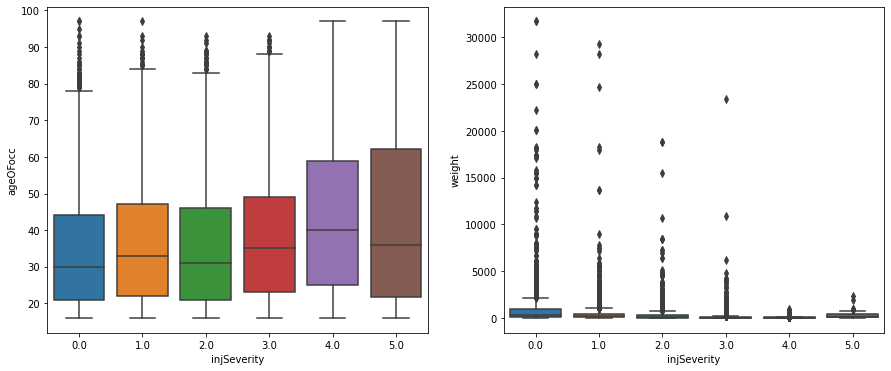

In [100]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(x=car['injSeverity'],y=car['ageOFocc'])
plt.subplot(1,2,2)
sns.boxplot(x=car['injSeverity'],y=car['weight'])

plt.show();

## Multi variate Analysis

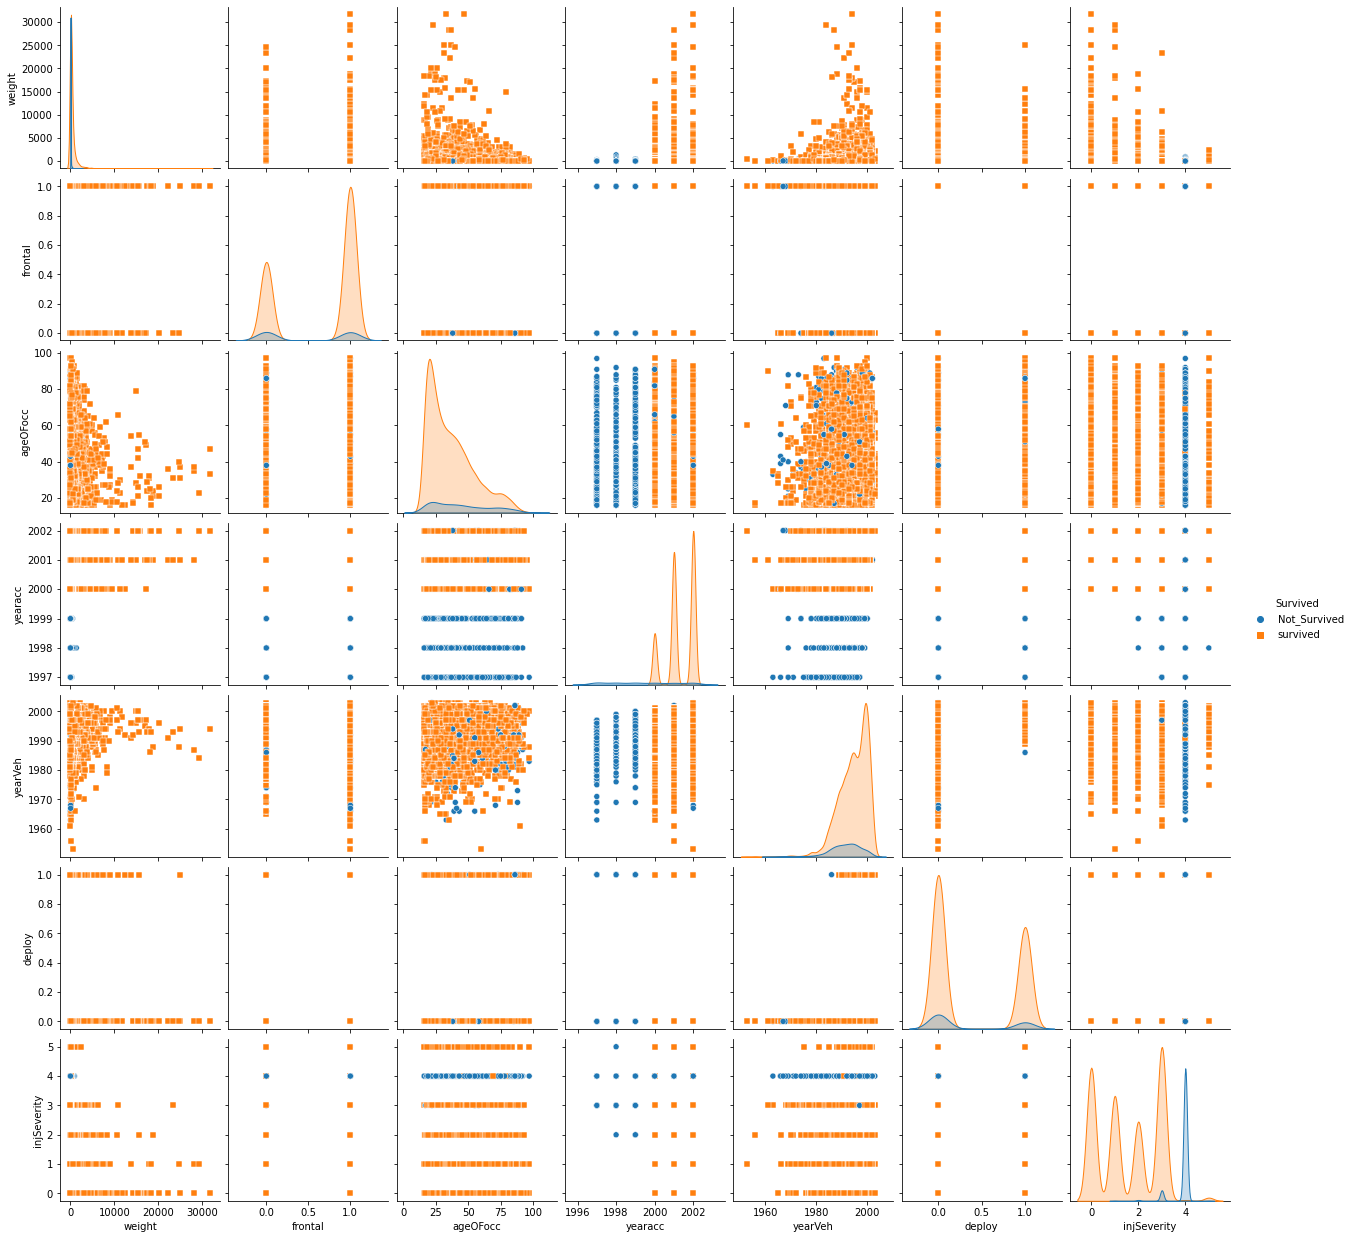

In [101]:
sns.pairplot(car, hue="Survived", markers=["o", "s"]);

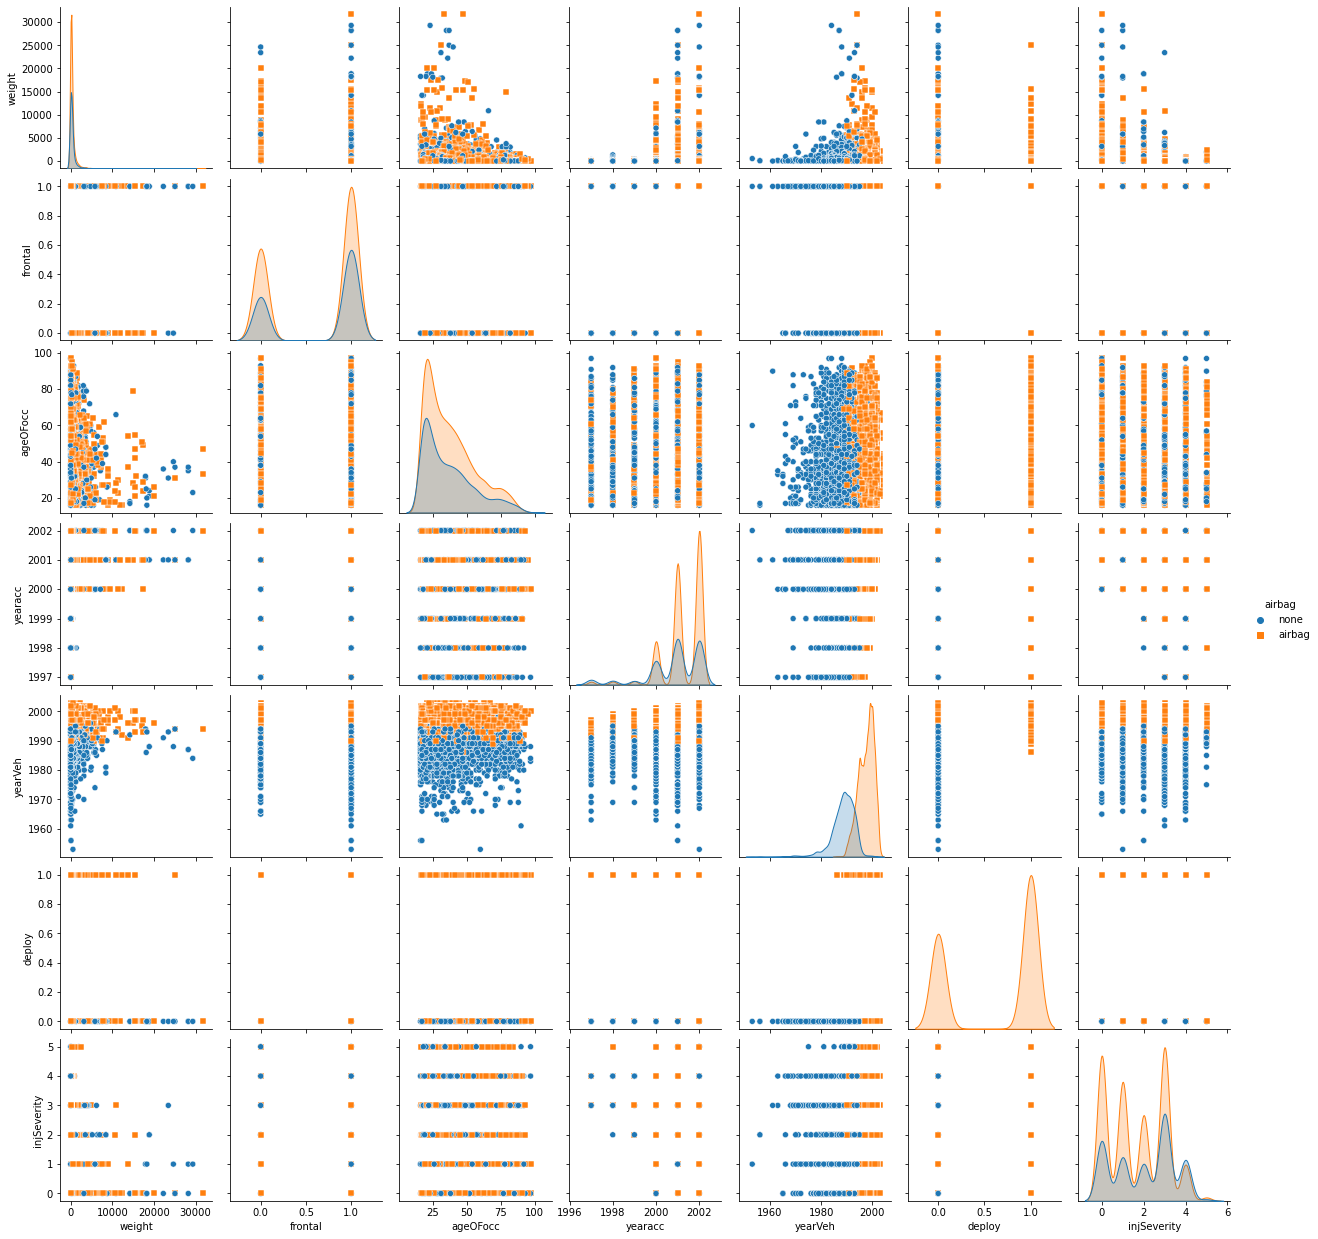

In [102]:
sns.pairplot(car, hue="airbag", markers=["o", "s"]);

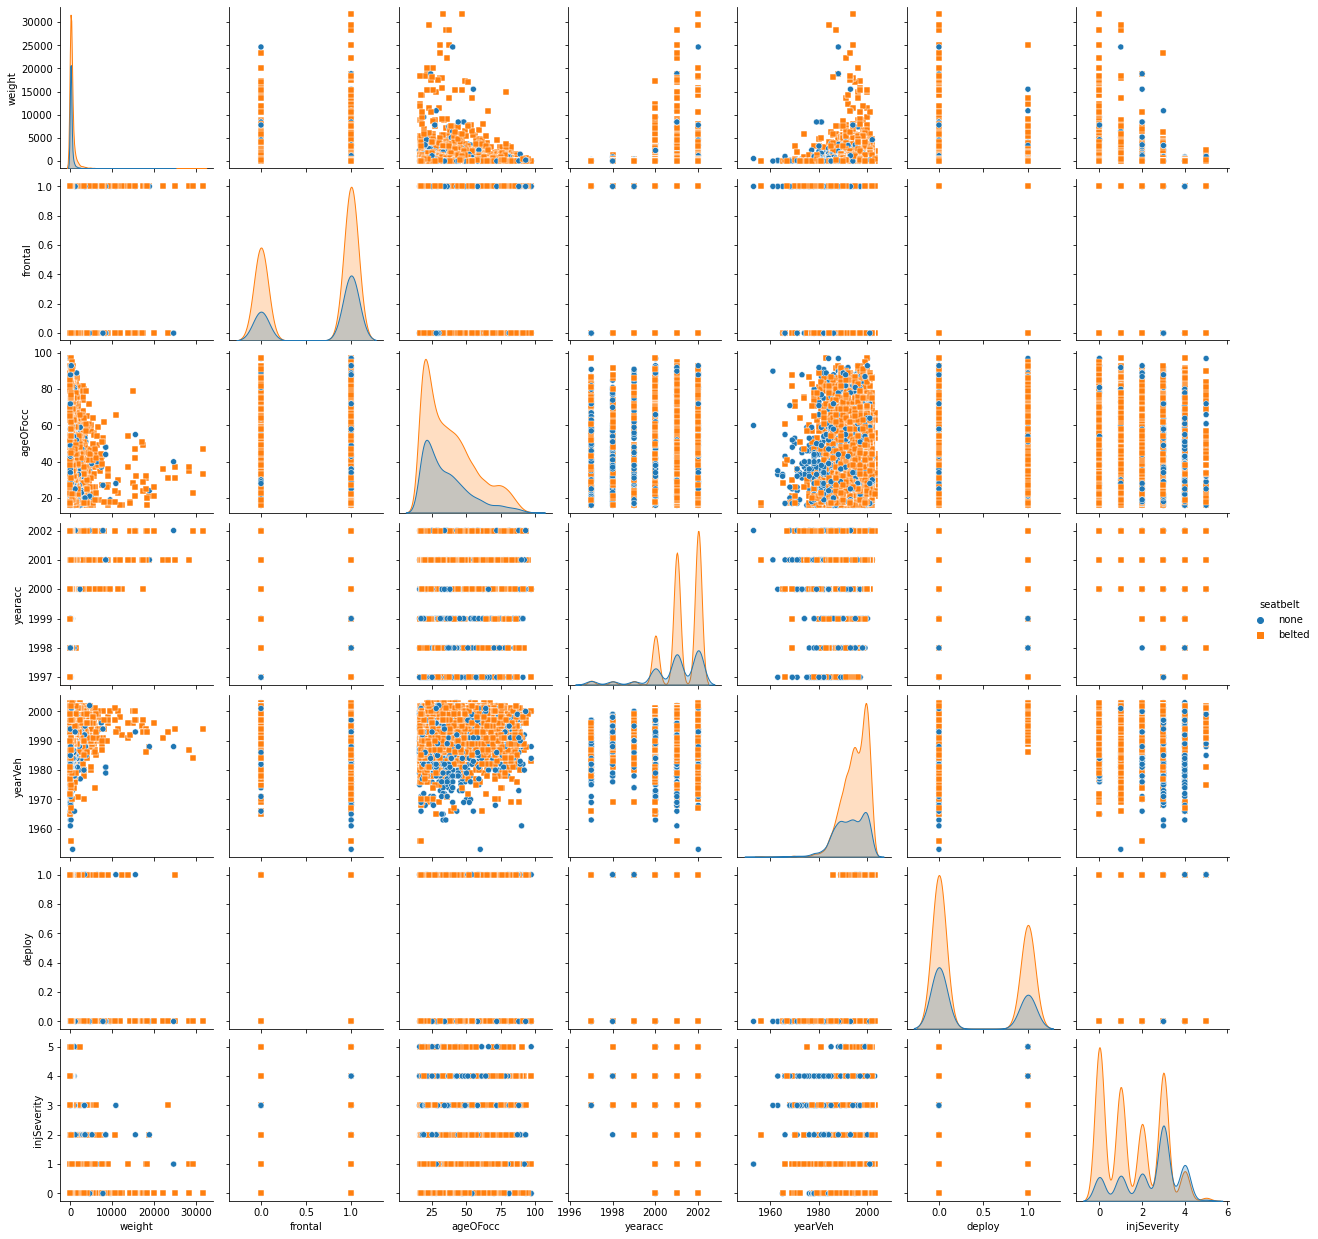

In [103]:
sns.pairplot(car, hue="seatbelt", markers=["o", "s"]);

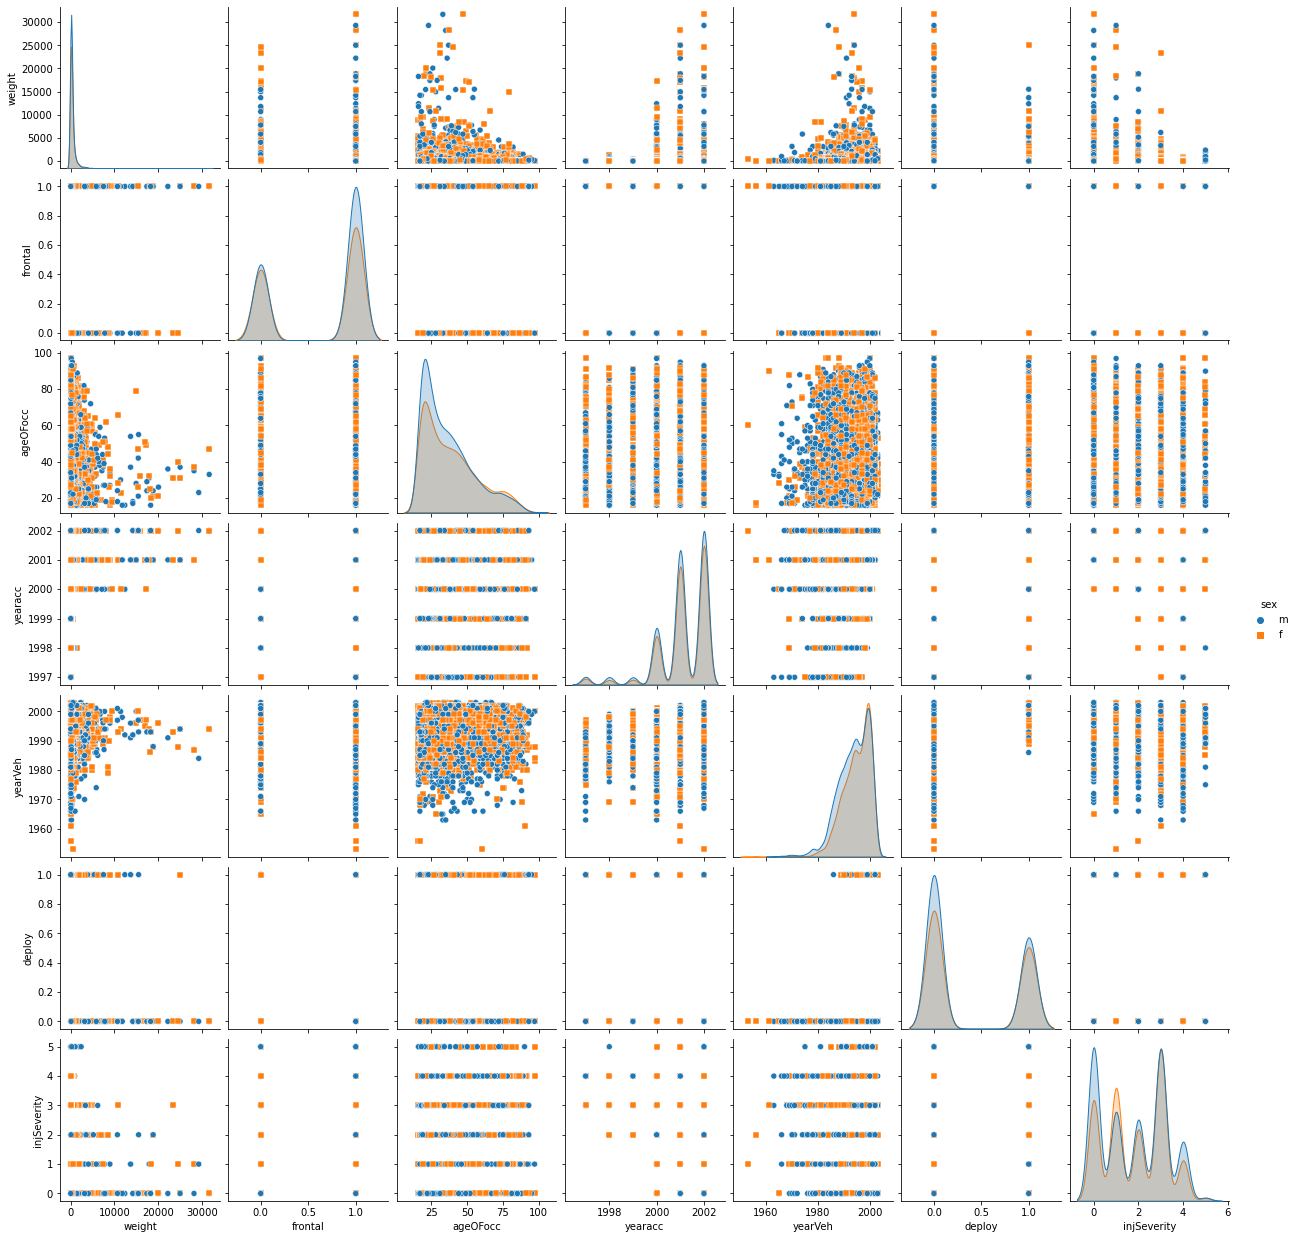

In [104]:
sns.pairplot(car, hue="sex", markers=["o", "s"]);

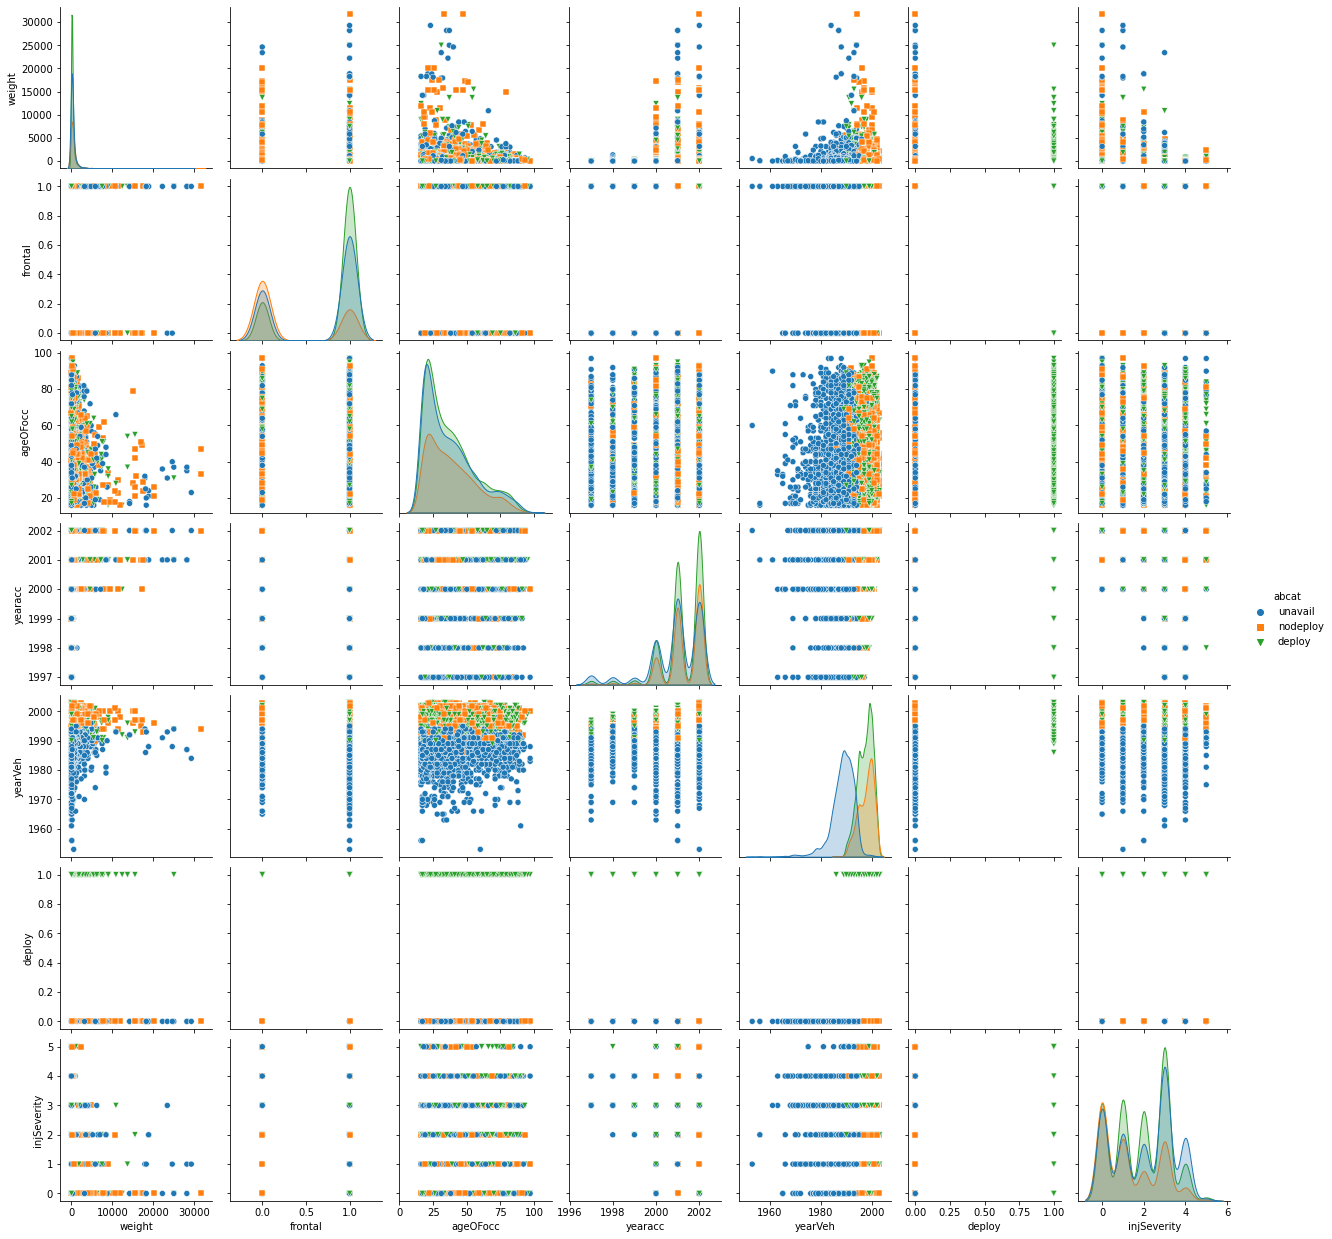

In [105]:
sns.pairplot(car, hue="abcat", markers=["o", "s","v"]);

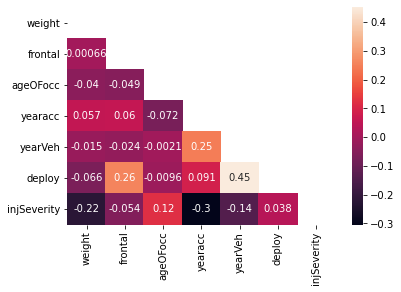

In [106]:
corr = car.corr()
sns.heatmap(corr,annot=True,mask=np.triu(corr));

In [107]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        11217 non-null  object 
 1   weight       11217 non-null  float64
 2   Survived     11217 non-null  object 
 3   airbag       11217 non-null  object 
 4   seatbelt     11217 non-null  object 
 5   frontal      11217 non-null  int64  
 6   sex          11217 non-null  object 
 7   ageOFocc     11217 non-null  int64  
 8   yearacc      11217 non-null  int64  
 9   yearVeh      11217 non-null  float64
 10  abcat        11217 non-null  object 
 11  occRole      11217 non-null  object 
 12  deploy       11217 non-null  int64  
 13  injSeverity  11217 non-null  float64
dtypes: float64(3), int64(4), object(7)
memory usage: 1.2+ MB


## 2.2) Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [108]:
for feature in car.select_dtypes('object').columns: 
    if car[feature].dtype == 'object': 
        print('\n')
        print('feature:',car)
        print(pd.Categorical(car[feature].unique()))
        print(pd.Categorical(car[feature].unique()).codes)
        car[feature] = pd.Categorical(car[feature]).codes



feature:        dvcat    weight      Survived  airbag seatbelt  frontal sex  ageOFocc  \
0        55+    27.078  Not_Survived    none     none        1   m        32   
1      25-39    89.627  Not_Survived  airbag   belted        0   f        54   
2        55+    27.078  Not_Survived    none   belted        1   m        67   
3        55+    27.078  Not_Survived    none   belted        1   f        64   
4        55+    13.374  Not_Survived    none     none        1   m        23   
...      ...       ...           ...     ...      ...      ...  ..       ...   
11212  25-39  3179.688      survived    none   belted        1   m        17   
11213  10-24    71.228      survived  airbag   belted        1   m        54   
11214  10-24    10.474      survived  airbag   belted        1   f        27   
11215  25-39    10.474      survived  airbag   belted        1   f        18   
11216  25-39    10.474      survived  airbag   belted        1   m        17   

       yearacc  yearVeh     

In [109]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        11217 non-null  int8   
 1   weight       11217 non-null  float64
 2   Survived     11217 non-null  int8   
 3   airbag       11217 non-null  int8   
 4   seatbelt     11217 non-null  int8   
 5   frontal      11217 non-null  int64  
 6   sex          11217 non-null  int8   
 7   ageOFocc     11217 non-null  int64  
 8   yearacc      11217 non-null  int64  
 9   yearVeh      11217 non-null  float64
 10  abcat        11217 non-null  int8   
 11  occRole      11217 non-null  int8   
 12  deploy       11217 non-null  int64  
 13  injSeverity  11217 non-null  float64
dtypes: float64(3), int64(4), int8(7)
memory usage: 690.2 KB


In [110]:
car.describe().T

,count,mean,std,min,25%,50%,75%,max
dvcat,11217.0,1.731122,0.958810,0.0,1.000,1.000,2.000,4.00
weight,11217.0,431.405309,1406.202941,0.0,28.292,82.195,324.056,31694.04
Survived,11217.0,0.894803,0.306821,0.0,1.000,1.000,1.000,1.00
airbag,11217.0,0.370242,0.482891,0.0,0.000,0.000,1.000,1.00
seatbelt,11217.0,0.300259,0.458391,0.0,0.000,0.000,1.000,1.00
frontal,11217.0,0.644022,0.478830,0.0,0.000,1.000,1.000,1.00
sex,11217.0,0.539182,0.498485,0.0,0.000,1.000,1.000,1.00
ageOFocc,11217.0,37.427654,18.192429,16.0,22.000,33.000,48.000,97.00
yearacc,11217.0,2001.103236,1.056805,1997.0,2001.000,2001.000,2002.000,2002.00
yearVeh,11217.0,1994.177944,5.658704,1953.0,1991.000,1995.000,1999.000,2003.00


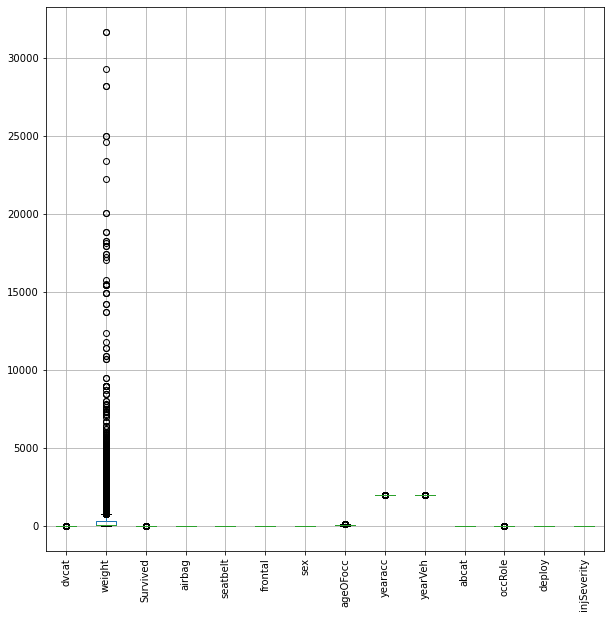

In [111]:
# outlier treatment
car.boxplot(figsize=(10,10))
plt.xticks(rotation=90)
plt.show()

In [112]:
car1 = ['weight','ageOFocc']

In [113]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [114]:
for column in car1:
    lr,ur=remove_outlier(car[column])
    car[column]=np.where(car[column]>ur,ur,car[column])
    car[column]=np.where(car[column]<lr,lr,car[column])

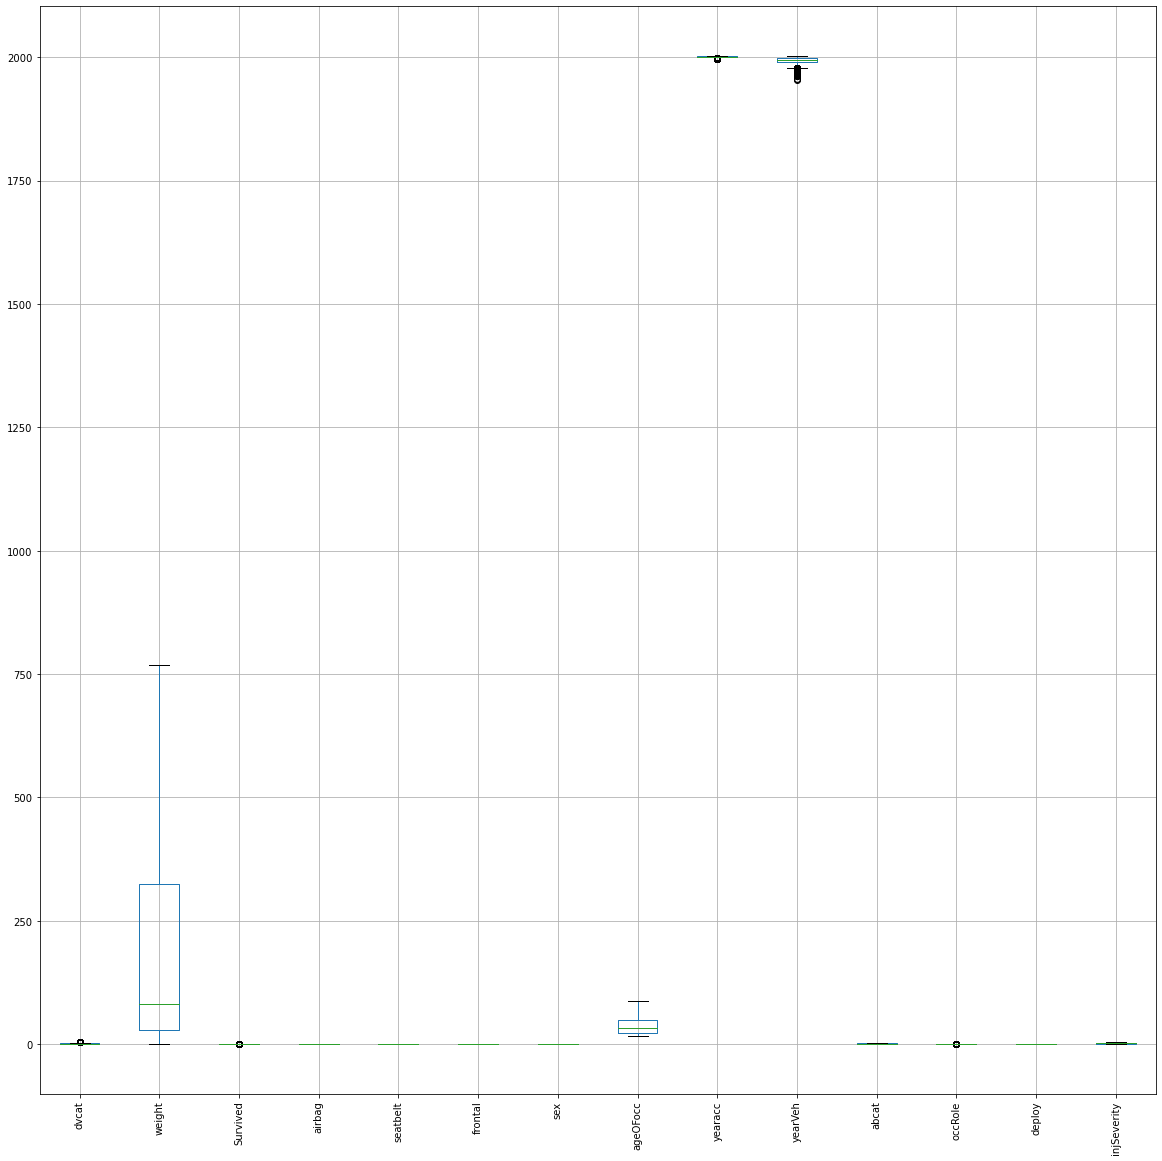

In [115]:
# outlier treatment
car.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

In [116]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        11217 non-null  int8   
 1   weight       11217 non-null  float64
 2   Survived     11217 non-null  int8   
 3   airbag       11217 non-null  int8   
 4   seatbelt     11217 non-null  int8   
 5   frontal      11217 non-null  int64  
 6   sex          11217 non-null  int8   
 7   ageOFocc     11217 non-null  float64
 8   yearacc      11217 non-null  int64  
 9   yearVeh      11217 non-null  float64
 10  abcat        11217 non-null  int8   
 11  occRole      11217 non-null  int8   
 12  deploy       11217 non-null  int64  
 13  injSeverity  11217 non-null  float64
dtypes: float64(4), int64(3), int8(7)
memory usage: 690.2 KB


In [117]:
# Copy all the predictor variables into X dataframe
X = car.drop(['Survived'],axis=1)

# Copy target into the y dataframe. 
y = car[['Survived']]

In [118]:
print(X.shape)
print(y.shape)

(11217, 13)
(11217, 1)


In [119]:
X.head()

,dvcat,weight,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity
0,4,27.078,1,1,1,1,32.0,1997,1987.0,2,0,0,4.0
1,2,89.627,0,0,0,0,54.0,1997,1994.0,1,0,0,4.0
2,4,27.078,1,0,1,1,67.0,1997,1992.0,2,0,0,4.0
3,4,27.078,1,0,1,0,64.0,1997,1992.0,2,1,0,4.0
4,4,13.374,1,1,1,1,23.0,1997,1986.0,2,0,0,4.0


In [120]:
y.head()

,Survived
0,0
1,0
2,0
3,0
4,0


In [121]:
# Split X and y into training and test set in 70:30atio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [122]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (7851, 13)
Number of rows and columns of the training set for the dependent variable: (7851, 1)
Number of rows and columns of the test set for the independent variables: (3366, 13)
Number of rows and columns of the test set for the dependent variable: (3366, 1)


In [123]:
y_train.value_counts(normalize=True)

Survived
1           0.89479
0           0.10521
dtype: float64

In [124]:
y_test.value_counts(normalize=True)

Survived
1           0.894831
0           0.105169
dtype: float64

## Logistic Regression

In [125]:
from sklearn.linear_model import LogisticRegression

In [126]:
# Fit the Logistic Regression model
model_log = LogisticRegression(solver='newton-cg',max_iter=600,penalty='none',verbose=True,n_jobs=2)
model_log.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.6s finished


LogisticRegression(max_iter=600, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [127]:
ytrain_predict_log = model_log.predict(X_train)
ytest_predict_log = model_log.predict(X_test)

In [128]:
ytest_predict_prob_log = model_log.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_log).head()

,0,1
0,2.190988e-02,0.978090
1,1.664087e-03,0.998336
2,2.825831e-03,0.997174
3,9.523584e-09,1.000000
4,1.333902e-02,0.986661


## Grid search on Logistic Regression

In [129]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs','newton-cg'],
      'tol':[0.001,0.0001]}

In [130]:
model_grid = LogisticRegression(max_iter=500,n_jobs=2)

In [131]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = model_grid, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [132]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=500, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'newton-cg'],
                         'tol': [0.001, 0.0001]},
             scoring='f1')

In [133]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'newton-cg', 'tol': 0.001} 

LogisticRegression(max_iter=500, n_jobs=2, penalty='none', solver='newton-cg',
                   tol=0.001)


In [134]:
best_model_log = grid_search.best_estimator_

In [135]:
# Prediction on the training set

ytrain_predict_grid = best_model_log.predict(X_train)
ytest_predict_grid = best_model_log.predict(X_test)

In [136]:
## Getting the probabilities on the test set

ytest_predict_prob_grid = best_model_log.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_grid).head()

,0,1
0,2.193626e-02,0.978064
1,1.665427e-03,0.998335
2,2.832706e-03,0.997167
3,9.559140e-09,1.000000
4,1.334489e-02,0.986655


## Linear Discriminant Analysis

In [137]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [138]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model_LDA = clf.fit(X_train,y_train)

In [139]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train_LDA = model_LDA.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test_LDA = model_LDA.predict(X_test)

In [140]:
# Training Data Probability Prediction
pred_prob_train_LDA = model_LDA.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test_LDA = model_LDA.predict_proba(X_test)

## 2.3) Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Compare both the models and write inferences, which model is best/optimized.

# Logistic regression 

In [141]:
# Accuracy - Training Data
model_log.score(X_train, y_train)

0.980639408992485

In [142]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

AUC: 0.992


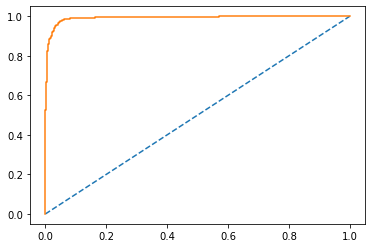

In [143]:
# predict probabilities
probs_log = model_log.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_log = probs_log[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs_log)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_log)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [144]:
# Accuracy - Test Data
model_log.score(X_test, y_test)

0.9827688651218063

AUC: 0.992


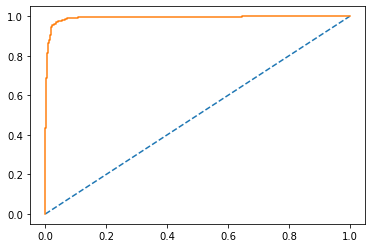

In [145]:
# predict probabilities
probs_log = model_log.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_log = probs_log[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs_log)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_log)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Confusion matrix on train data

In [146]:
confusion_matrix(y_train, ytrain_predict_log)

array([[ 728,   98],
       [  54, 6971]], dtype=int64)

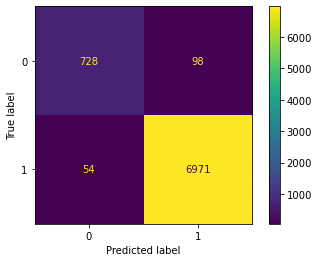

In [147]:
plot_confusion_matrix(model_log,X_train,y_train);

In [148]:
print(classification_report(y_train, ytrain_predict_log))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91       826
           1       0.99      0.99      0.99      7025

    accuracy                           0.98      7851
   macro avg       0.96      0.94      0.95      7851
weighted avg       0.98      0.98      0.98      7851



### Confusion matrix on test data

In [149]:
confusion_matrix(y_test, ytest_predict_log)

array([[ 316,   38],
       [  20, 2992]], dtype=int64)

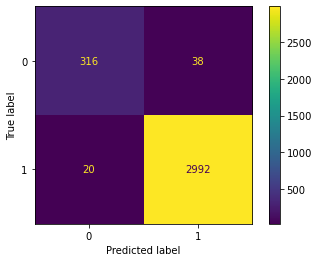

In [150]:
plot_confusion_matrix(model_log,X_test,y_test);

In [151]:
print(classification_report(y_test, ytest_predict_log))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       354
           1       0.99      0.99      0.99      3012

    accuracy                           0.98      3366
   macro avg       0.96      0.94      0.95      3366
weighted avg       0.98      0.98      0.98      3366



# Grid search cv for logistic regression

In [152]:
# Accuracy - Training Data
best_model_log.score(X_train, y_train)

0.980639408992485

AUC: 0.992


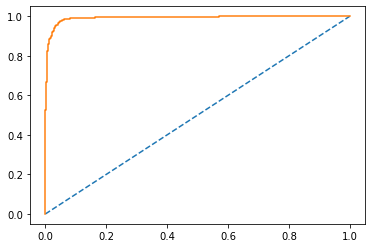

In [153]:
# predict probabilities
probs_grid = best_model_log.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_grid = probs_grid[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs_grid)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_grid)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [154]:
# Accuracy - Test Data
best_model_log.score(X_test, y_test)

0.9827688651218063

AUC: 0.992


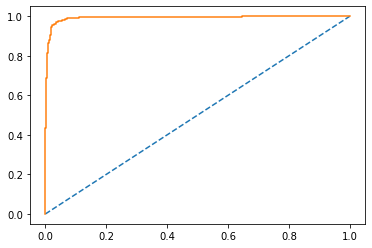

In [155]:
# predict probabilities
probs_grid = best_model_log.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_grid = probs_grid[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs_grid)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_grid)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Confusion matrix on the training data

              precision    recall  f1-score   support

           0       0.93      0.88      0.91       826
           1       0.99      0.99      0.99      7025

    accuracy                           0.98      7851
   macro avg       0.96      0.94      0.95      7851
weighted avg       0.98      0.98      0.98      7851
 



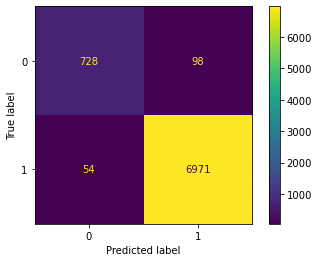

In [156]:
plot_confusion_matrix(best_model_log,X_train,y_train)
print(classification_report(y_train, ytrain_predict_grid),'\n');

### Confusion matrix on the test data

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       354
           1       0.99      0.99      0.99      3012

    accuracy                           0.98      3366
   macro avg       0.96      0.94      0.95      3366
weighted avg       0.98      0.98      0.98      3366
 



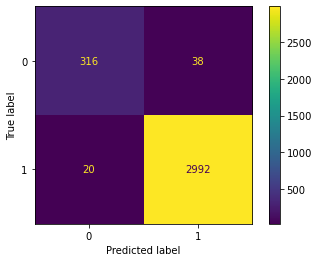

In [157]:
plot_confusion_matrix(best_model_log,X_test,y_test)
print(classification_report(y_test, ytest_predict_grid),'\n');

# Linear Discriminant Analysis

In [158]:
# Accuracy - Training Data
model_LDA.score(X_train, y_train)

0.9612788179849701

AUC: 0.969


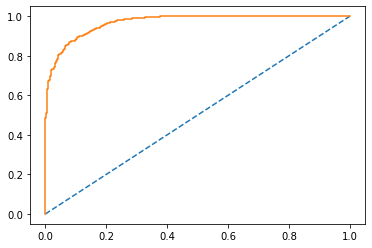

In [159]:
# predict probabilities
probs_LDA = model_LDA.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_LDA = probs_LDA[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs_LDA)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_LDA)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [160]:
# Accuracy - Test Data
model_LDA.score(X_test, y_test)

0.9607843137254902

AUC: 0.969


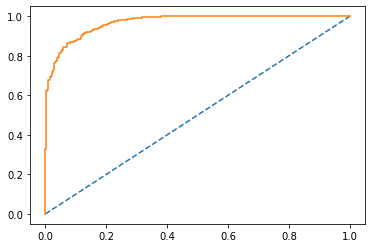

In [161]:
# predict probabilities
probs_LDA = model_LDA.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_LDA = probs_LDA[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs_LDA)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_LDA)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Confusion matrix on the training data

              precision    recall  f1-score   support

           0       0.91      0.70      0.79       826
           1       0.97      0.99      0.98      7025

    accuracy                           0.96      7851
   macro avg       0.94      0.85      0.89      7851
weighted avg       0.96      0.96      0.96      7851
 



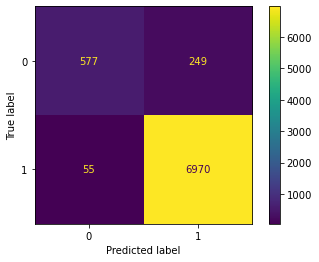

In [162]:
plot_confusion_matrix(model_LDA,X_train,y_train)
print(classification_report(y_train, pred_class_train_LDA),'\n');

### Confusion matrix on the test data

              precision    recall  f1-score   support

           0       0.89      0.71      0.79       354
           1       0.97      0.99      0.98      3012

    accuracy                           0.96      3366
   macro avg       0.93      0.85      0.89      3366
weighted avg       0.96      0.96      0.96      3366
 



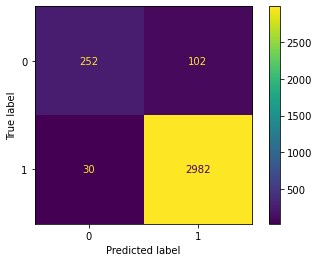

In [163]:
plot_confusion_matrix(model_LDA,X_test,y_test)
print(classification_report(y_test, pred_class_test_LDA),'\n');

In [164]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [165]:
i=0
for column in X.columns:
    if i < 10:
        print (column ,"--->",  vif[i])
        i = i+1

dvcat ---> 1.3962681654465483
weight ---> 1.3046461349296776
airbag ---> 1549673.6062736937
seatbelt ---> 1.1532622614399186
frontal ---> 1.1927646994493022
sex ---> 1.0529486848839062
ageOFocc ---> 1.048116220167873
yearacc ---> 1.1752830193247497
yearVeh ---> 2.5395638120430837
abcat ---> 7201644.556932432


## 2.4) Inference: Based on these predictions, what are the insights and recommendations.

<--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------->